#Libraries and Github

In [1]:
import re
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score

In [2]:
!git clone https://github.com/FaridRash/Advance-Statistical-Learnin--Semester-3

Cloning into 'Advance-Statistical-Learnin--Semester-3'...
remote: Enumerating objects: 649, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 649 (delta 53), reused 15 (delta 14), pack-reused 574 (from 1)
Receiving objects: 100% (649/649), 64.24 MiB | 15.51 MiB/s, done.
Resolving deltas: 100% (345/345), done.


#Data Reading

In [3]:
df = pd.read_csv('/content/Advance-Statistical-Learnin--Semester-3/Dataset/df_sla.csv')
display(df.head())
df.info()

,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,1,1,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,>80,...,11.0,4.0,4.0,0.0,7.0,3,14.0,0.785714,37.0,35.0
1,1,2,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,60-80,...,13.0,0.0,6.0,0.0,7.0,4B,19.0,0.684211,35.0,30.0
2,1,3,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,12.0,1.0,3.0,2.0,7.0,4B,23.0,0.565217,35.0,25.0
3,1,4,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,40-60,...,12.0,4.0,5.0,0.0,7.0,4B,26.0,0.538462,34.0,45.0
4,1,5,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,11.0,1.0,4.0,0.0,7.0,4B,29.0,0.689655,28.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           1412 non-null   int64  
 1   Visit_ID             1412 non-null   int64  
 2   Date_of_birth        1412 non-null   object 
 3   Symptom_onset_date   1412 non-null   object 
 4   Diagnosis_date       1412 non-null   object 
 5   Sex                  1412 non-null   int64  
 6   Age_at_onset         1412 non-null   float64
 7   Clinical_onset_type  1412 non-null   object 
 8   Spirometry           1387 non-null   float64
 9   FVC                  1412 non-null   object 
 10  Ventilation          1412 non-null   float64
 11  Tracheostomy         1412 non-null   int64  
 12  PEG                  1412 non-null   float64
 13  Family_history       1412 non-null   float64
 14  Therapy              1412 non-null   object 
 15  Diagnostic_delay     1412 non-null   f

#Data Understanding

##Categorical

###Patient_ID

In [4]:
print(df['Patient_ID'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

###Visit_ID

In [5]:
visit_counts = df.groupby('Patient_ID')['Visit_ID'].count()
display(visit_counts)

,Visit_ID
Patient_ID,
1,9
2,9
3,5
4,8
5,1
...,...
250,3
251,4
252,2


###Clinical_onset_type

,count
Clinical_onset_type,
spinale,1113
bulbare,269
respiratorio,21
multiplo,9


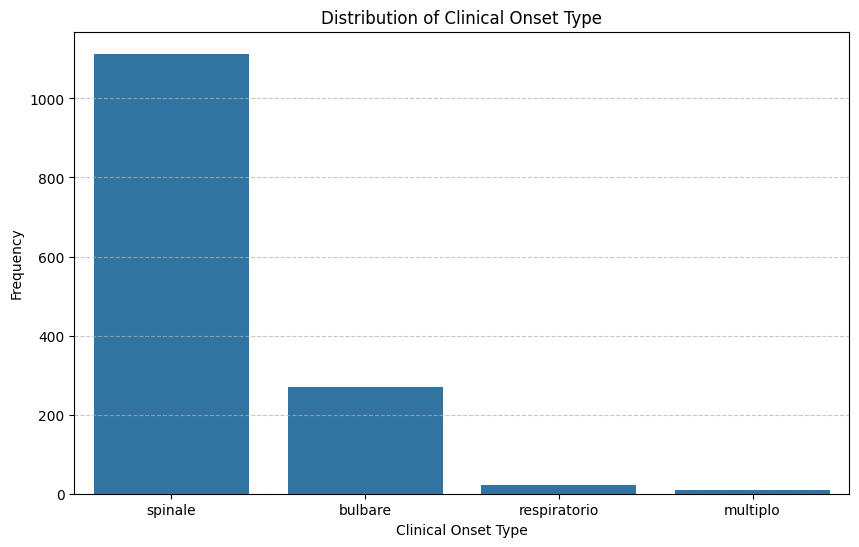

In [6]:
# Display the count of each unique value in Clinical_onset_type
display(df['Clinical_onset_type'].value_counts())

# Create a bar plot for Clinical_onset_type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Clinical_onset_type', order=df['Clinical_onset_type'].value_counts().index)
plt.title('Distribution of Clinical Onset Type')
plt.xlabel('Clinical Onset Type')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Tracheostomy

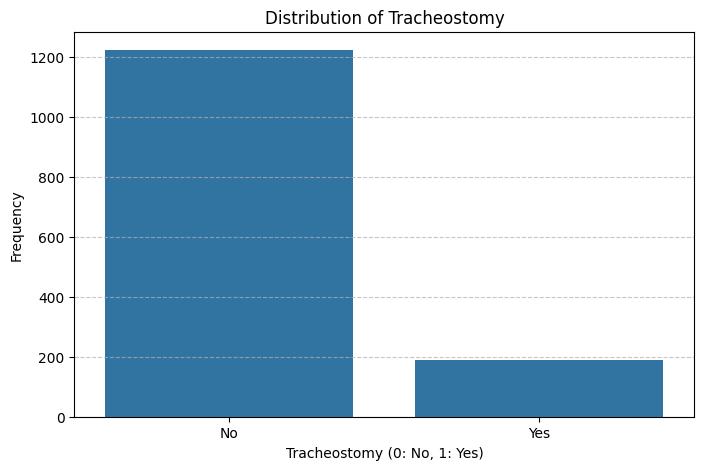

In [7]:
# Create a bar plot for Tracheostomy
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Tracheostomy')
plt.title('Distribution of Tracheostomy')
plt.xlabel('Tracheostomy (0: No, 1: Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Family_history

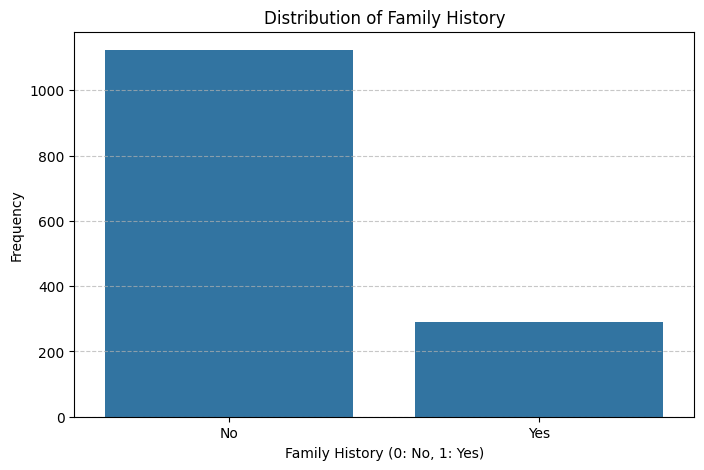

In [8]:
# Create a bar plot for Family_history
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Family_history')
plt.title('Distribution of Family History')
plt.xlabel('Family History (0: No, 1: Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Therapy

In [9]:
df["Therapy"].unique()

array(['Riluzolo', 'nessuna terapia', 'Edaravone', 'Riluzolo e Edaravone'],
      dtype=object)

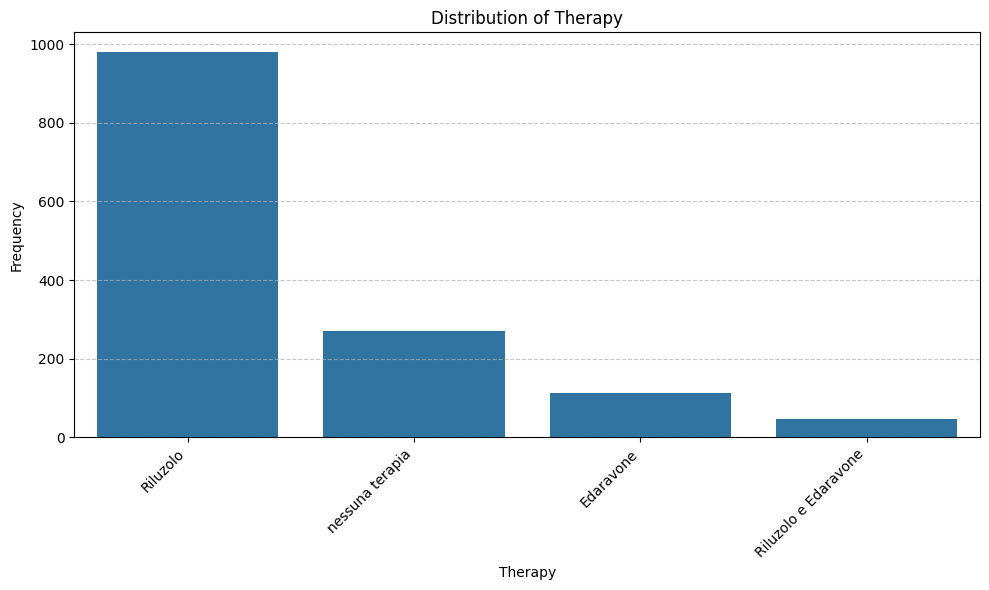

In [10]:
# Create a bar plot for Therapy
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Therapy', order=df['Therapy'].value_counts().index)
plt.title('Distribution of Therapy')
plt.xlabel('Therapy')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Ventilation

In [11]:
print(df['Ventilation'].unique())

[1. 0. 3. 2.]


In [12]:
# Transform values 2 and 3 in 'Ventilation' to 1
df['Ventilation'] = df['Ventilation'].replace({2: 1, 3: 1})

# Display the updated unique values to confirm the transformation
print(df['Ventilation'].unique())
df.head()

[1. 0.]


,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,1,1,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,>80,...,11.0,4.0,4.0,0.0,7.0,3,14.0,0.785714,37.0,35.0
1,1,2,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,60-80,...,13.0,0.0,6.0,0.0,7.0,4B,19.0,0.684211,35.0,30.0
2,1,3,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,12.0,1.0,3.0,2.0,7.0,4B,23.0,0.565217,35.0,25.0
3,1,4,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,40-60,...,12.0,4.0,5.0,0.0,7.0,4B,26.0,0.538462,34.0,45.0
4,1,5,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,11.0,1.0,4.0,0.0,7.0,4B,29.0,0.689655,28.0,50.0


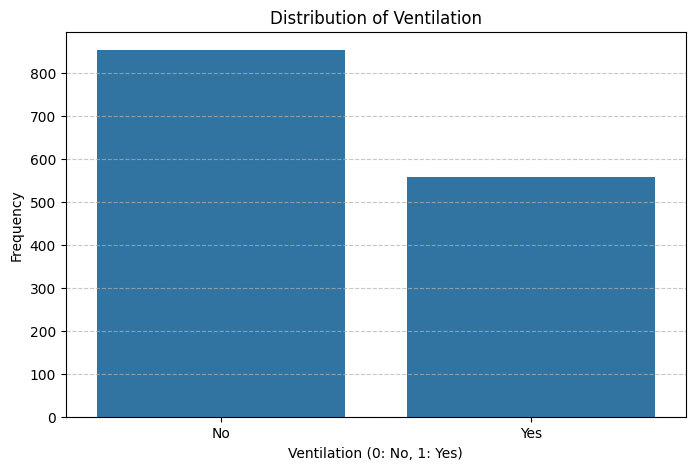

In [13]:
# Create a bar plot for Ventilation
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Ventilation')
plt.title('Distribution of Ventilation')
plt.xlabel('Ventilation (0: No, 1: Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Count the number of rows where 'Ventilation' is 0
ventilation_zero_count = df[df['Ventilation'] == 0].shape[0]
print(f"Number of patients with Ventilation = 0: {ventilation_zero_count}")

# Count the number of rows where 'Ventilation' is above 0
ventilation_above_zero_count = df[df['Ventilation'] > 0].shape[0]
print(f"Number of patients with Ventilation > 0: {ventilation_above_zero_count}")

Number of patients with Ventilation = 0: 854
Number of patients with Ventilation > 0: 558


###PEG

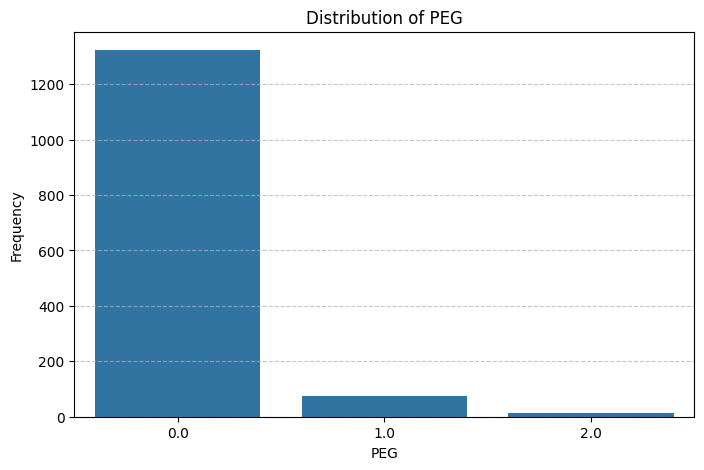

In [15]:
# Create a bar plot for PEG
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PEG')
plt.title('Distribution of PEG')
plt.xlabel('PEG')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

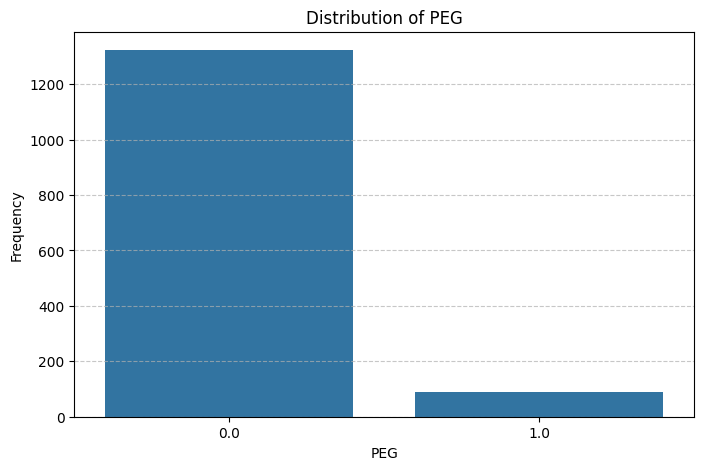

In [16]:
# change value 2 to 1
df['PEG'] = df['PEG'].replace({2: 1})

# Create a bar plot for PEG
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PEG')
plt.title('Distribution of PEG')
plt.xlabel('PEG')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



###KINGS_Total

In [17]:
print(df['KINGS_Total'].unique())

['3' '4B' '2' '4A' '1' '0']


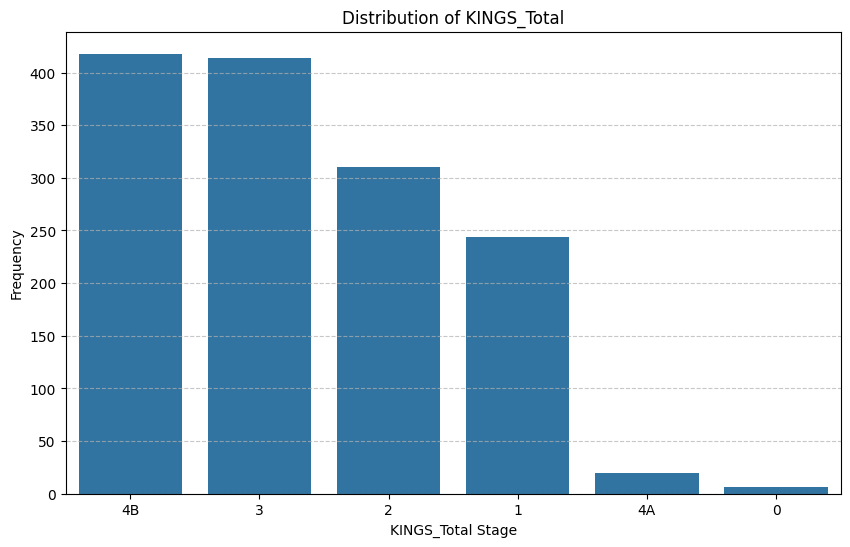

In [18]:
# Create a bar plot for KINGS_Total
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='KINGS_Total', order=df['KINGS_Total'].value_counts().index)
plt.title('Distribution of KINGS_Total')
plt.xlabel('KINGS_Total Stage')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Numerical

###Age_at_onset

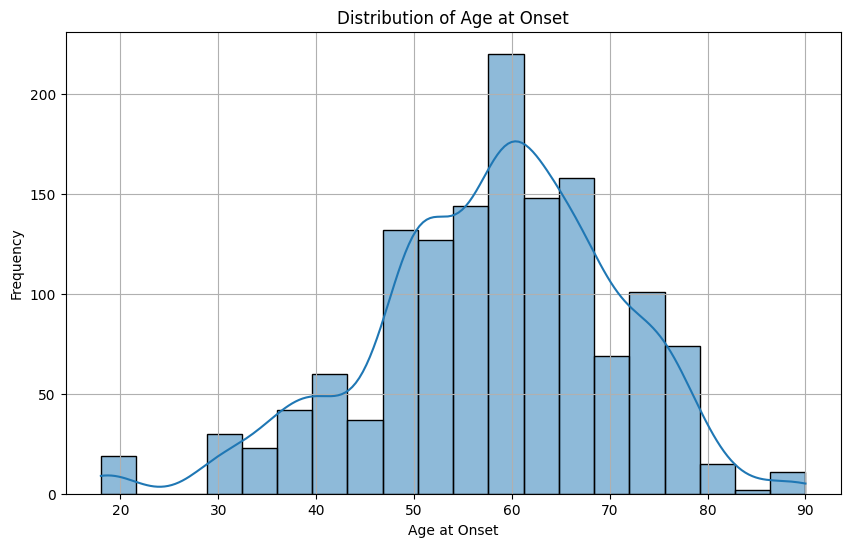

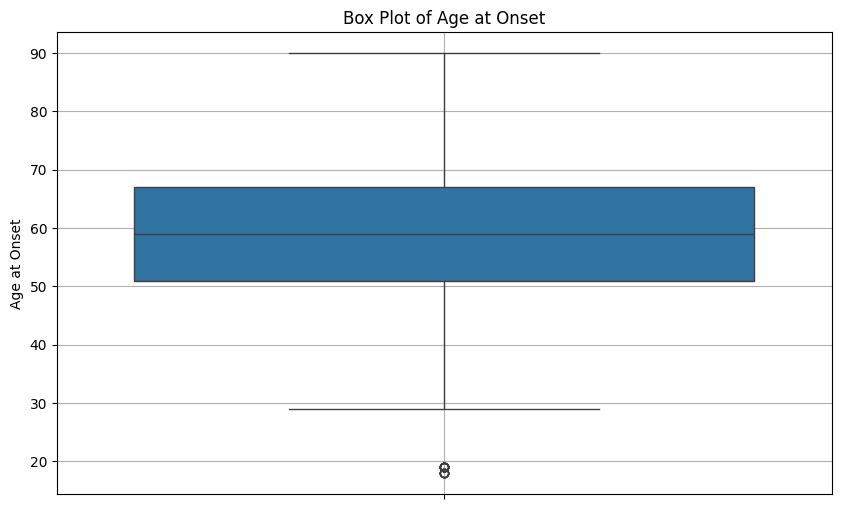

In [19]:
# Histogram for Age_at_onset
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age_at_onset', bins=20, kde=True)
plt.title('Distribution of Age at Onset')
plt.xlabel('Age at Onset')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for Age_at_onset
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Age_at_onset')
plt.title('Box Plot of Age at Onset')
plt.ylabel('Age at Onset')
plt.grid(True)
plt.show()

###Diagnostic_delay

In [20]:
df['Diagnostic_delay'].describe()

,Diagnostic_delay
count,1412.000000
mean,17.800992
std,17.726065
min,1.000000
25%,8.000000
50%,12.500000
75%,22.000000
max,123.000000


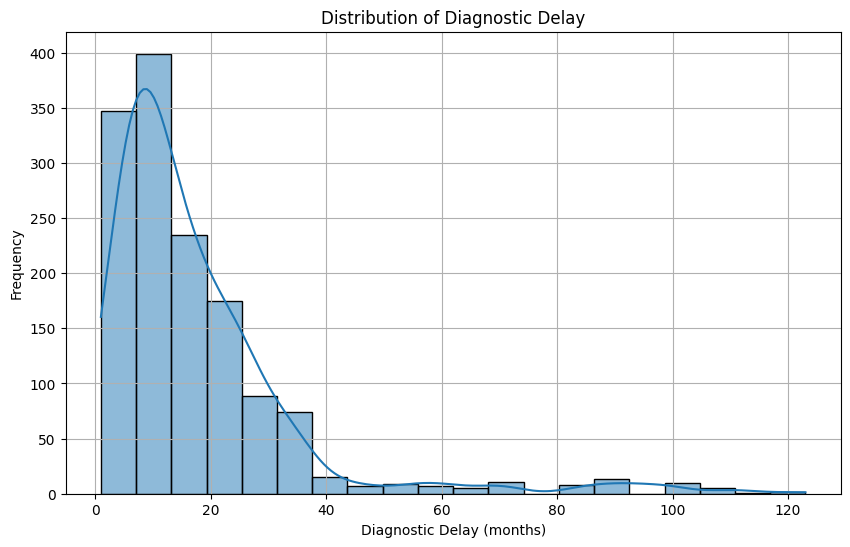

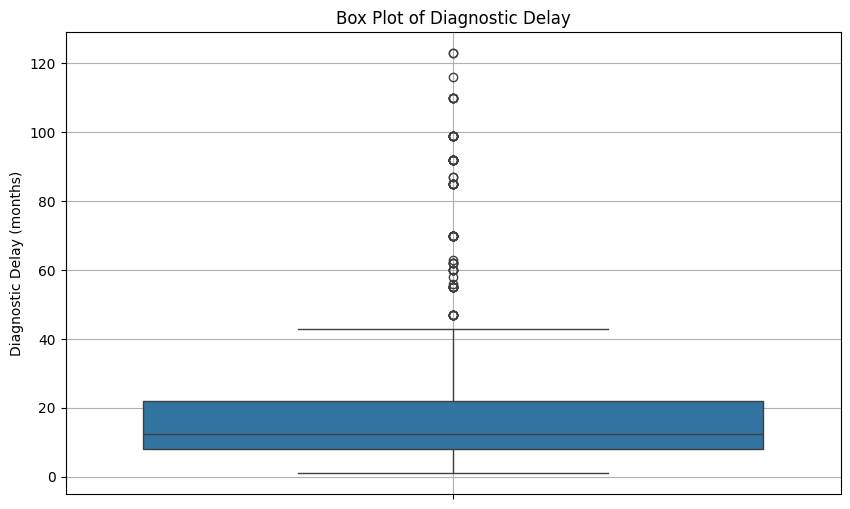

In [21]:
# Histogram for Diagnostic_delay
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Diagnostic_delay', bins=20, kde=True)
plt.title('Distribution of Diagnostic Delay')
plt.xlabel('Diagnostic Delay (months)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for Diagnostic_delay
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Diagnostic_delay')
plt.title('Box Plot of Diagnostic Delay')
plt.ylabel('Diagnostic Delay (months)')
plt.grid(True)
plt.show()

###MRC_Upper_Limb

In [22]:
print(df['MRC_Upper_Limb'].unique())

[69. 63. 58. 46. 45. 49. 44.  0. 70. 68. 65. 43. 35. 34. 61. 56. 59. 55.
 38. 31. 16. 36. 62. 60. 29. 51. 40. 30. 27. 28. 18.  6. 50. 33. 64. 47.
 37. 26. 24.  8. 39. 67. 66. 54. 52. 32. 23. 20. 19. 42.  2. 57. 22. 48.
 41.  7. 10. 13. 11. 21. 53.  4. 25. 15. 14. 12.  9. 17.  5.  1.  3.]


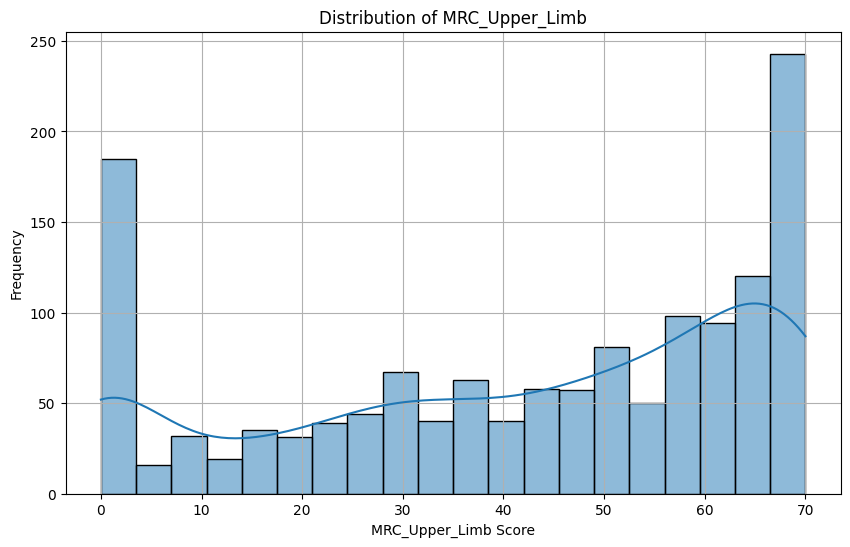

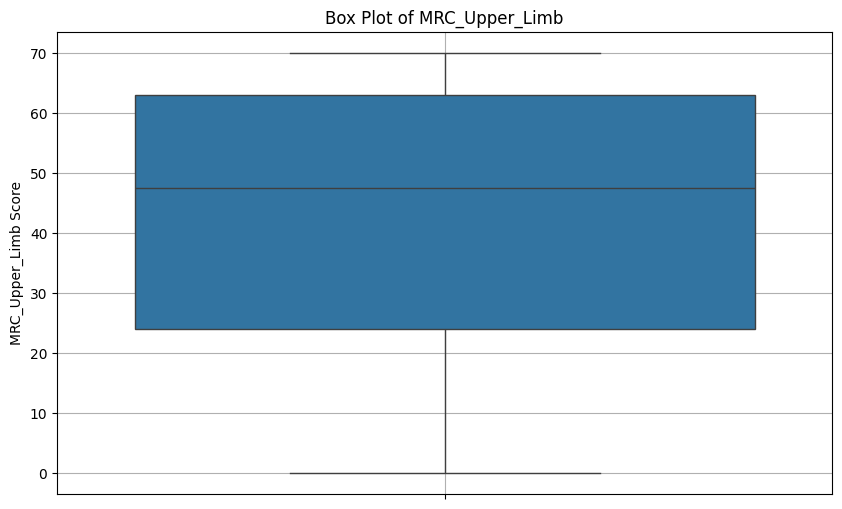

In [23]:
# Histogram for MRC_Upper_Limb
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MRC_Upper_Limb', bins=20, kde=True)
plt.title('Distribution of MRC_Upper_Limb')
plt.xlabel('MRC_Upper_Limb Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for MRC_Upper_Limb
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='MRC_Upper_Limb')
plt.title('Box Plot of MRC_Upper_Limb')
plt.ylabel('MRC_Upper_Limb Score')
plt.grid(True)
plt.show()

###MRC_Lower_Limb

In [24]:
df['MRC_Lower_Limb'].describe()

,MRC_Lower_Limb
count,1412.000000
mean,35.992210
std,20.712485
min,0.000000
25%,20.000000
50%,40.500000
75%,55.000000
max,60.000000


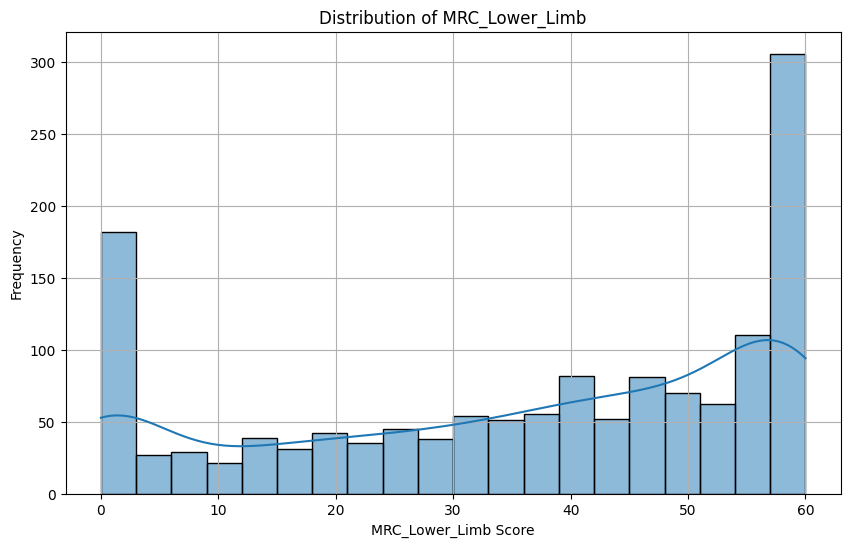

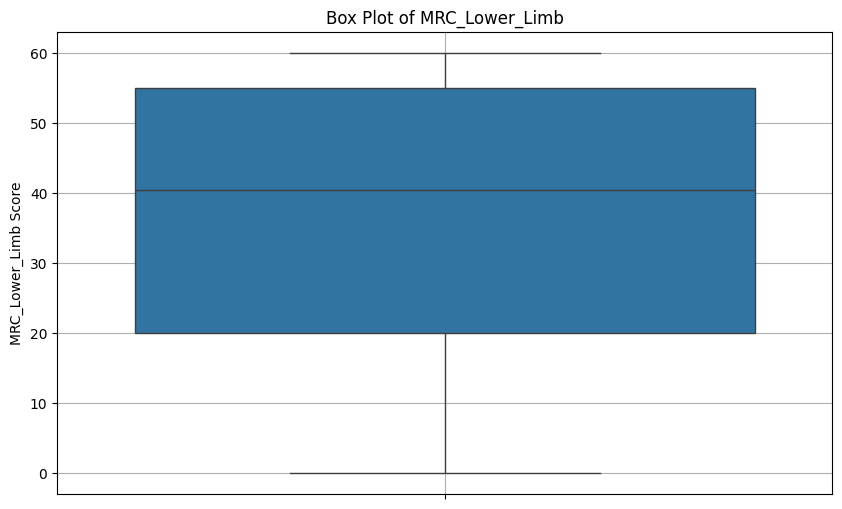

In [25]:
# Histogram for MRC_Lower_Limb
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MRC_Lower_Limb', bins=20, kde=True)
plt.title('Distribution of MRC_Lower_Limb')
plt.xlabel('MRC_Lower_Limb Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for MRC_Lower_Limb
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='MRC_Lower_Limb')
plt.title('Box Plot of MRC_Lower_Limb')
plt.ylabel('MRC_Lower_Limb Score')
plt.grid(True)
plt.show()

###MRC_Bulbar

In [26]:
df['MRC_Bulbar'].describe()

,MRC_Bulbar
count,1412.000000
mean,10.807365
std,4.615139
min,0.000000
25%,9.000000
50%,13.000000
75%,14.000000
max,15.000000


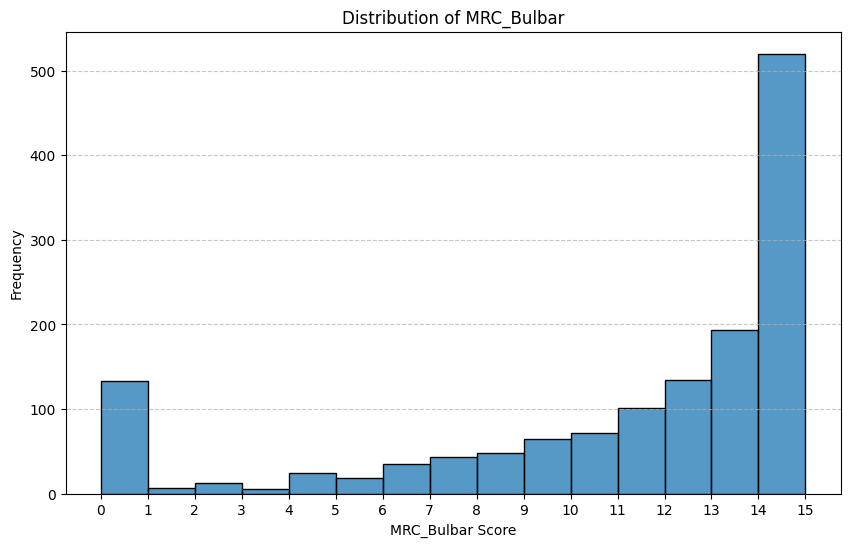

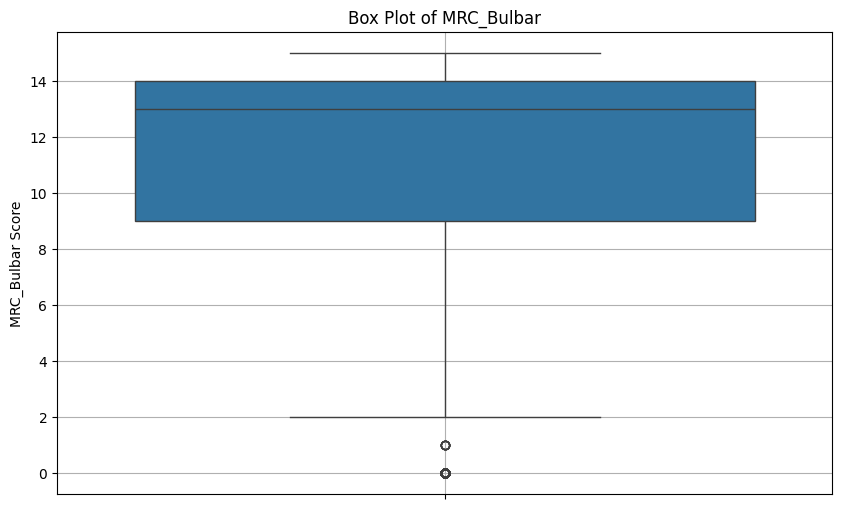

In [27]:
# Histogram for MRC_Bulbar
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MRC_Bulbar', bins=15, kde=False) # Bins based on unique values
plt.title('Distribution of MRC_Bulbar')
plt.xlabel('MRC_Bulbar Score')
plt.ylabel('Frequency')
plt.xticks(df['MRC_Bulbar'].unique()) # Set ticks at unique values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Box plot for MRC_Bulbar
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='MRC_Bulbar')
plt.title('Box Plot of MRC_Bulbar')
plt.ylabel('MRC_Bulbar Score')
plt.grid(True)
plt.show()

###PUMNS_Upper_Limb

In [28]:
df['PUMNS_Upper_Limb'].describe()

,PUMNS_Upper_Limb
count,1412.000000
mean,4.542493
std,3.758143
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,14.000000


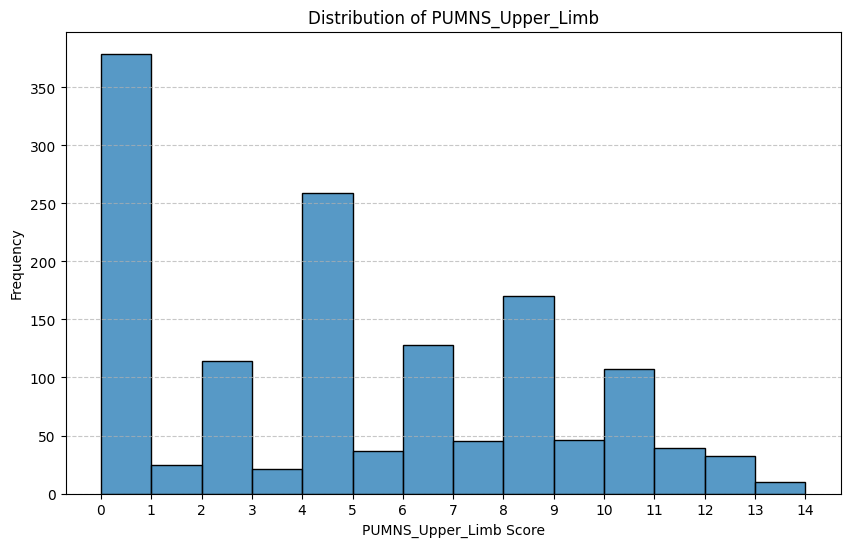

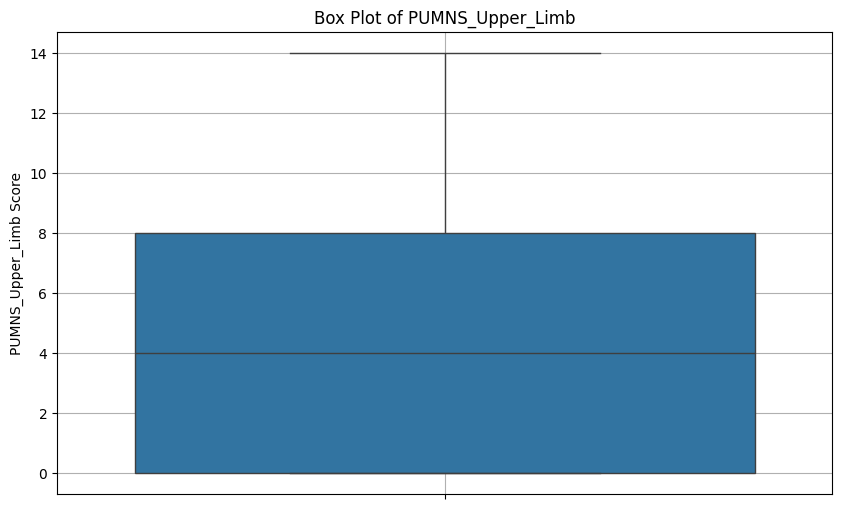

In [29]:
# Histogram for PUMNS_Upper_Limb
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PUMNS_Upper_Limb', bins=14, kde=False) # Bins based on unique values
plt.title('Distribution of PUMNS_Upper_Limb')
plt.xlabel('PUMNS_Upper_Limb Score')
plt.ylabel('Frequency')
plt.xticks(df['PUMNS_Upper_Limb'].unique()) # Set ticks at unique values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Box plot for PUMNS_Upper_Limb
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='PUMNS_Upper_Limb')
plt.title('Box Plot of PUMNS_Upper_Limb')
plt.ylabel('PUMNS_Upper_Limb Score')
plt.grid(True)
plt.show()

###PUMNS_Lower_Limb

In [30]:
df['PUMNS_Lower_Limb'].describe()

,PUMNS_Lower_Limb
count,1412.000000
mean,5.708924
std,4.002778
min,0.000000
25%,2.000000
50%,6.000000
75%,8.000000
max,14.000000


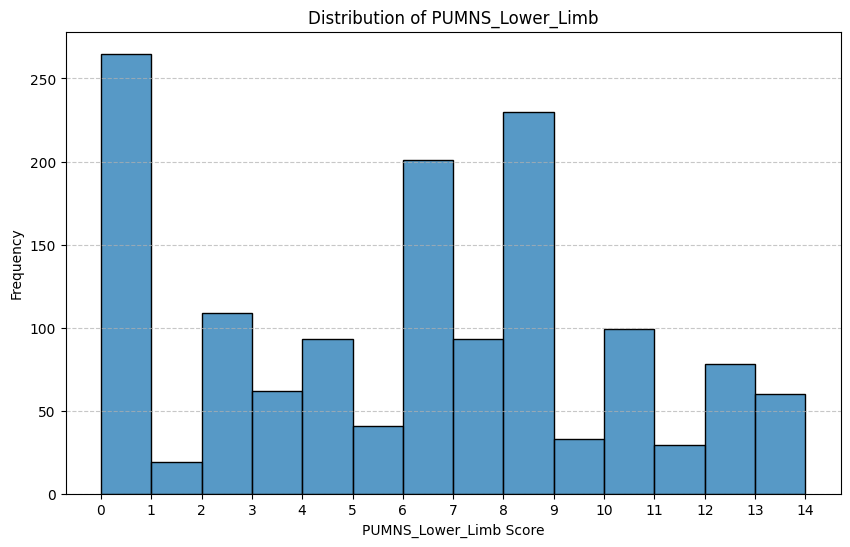

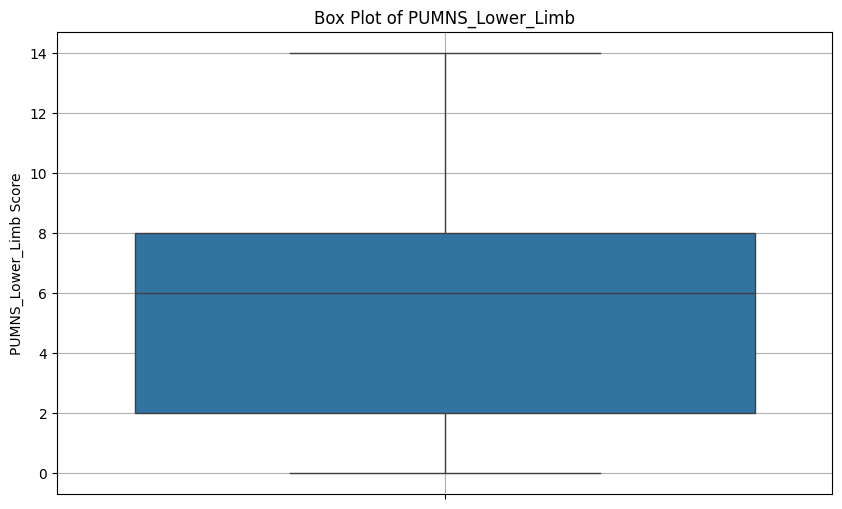

In [31]:
# Histogram for PUMNS_Lower_Limb
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PUMNS_Lower_Limb', bins=14, kde=False) # Bins based on unique values
plt.title('Distribution of PUMNS_Lower_Limb')
plt.xlabel('PUMNS_Lower_Limb Score')
plt.ylabel('Frequency')
plt.xticks(df['PUMNS_Lower_Limb'].unique()) # Set ticks at unique values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Box plot for PUMNS_Lower_Limb
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='PUMNS_Lower_Limb')
plt.title('Box Plot of PUMNS_Lower_Limb')
plt.ylabel('PUMNS_Lower_Limb Score')
plt.grid(True)
plt.show()

###PUMNS_Bulbar

In [32]:
df['PUMNS_Bulbar'].describe()

,PUMNS_Bulbar
count,1412.000000
mean,1.425637
std,1.312101
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


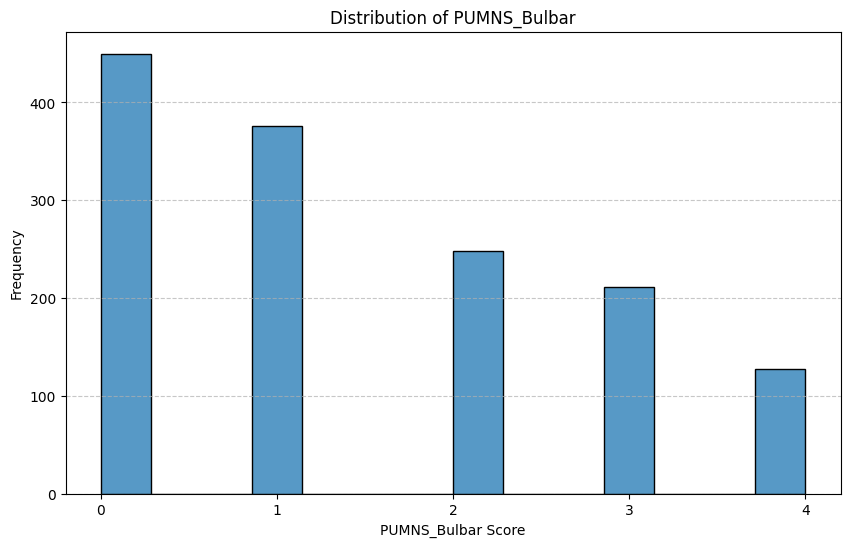

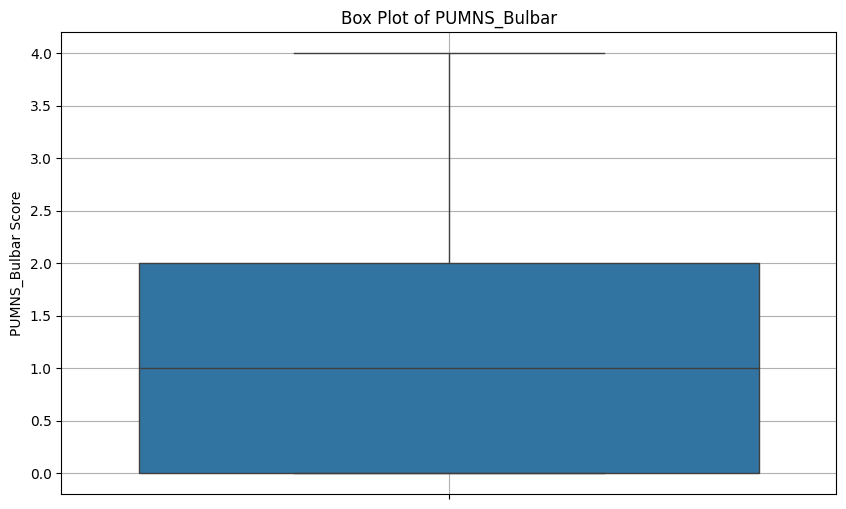

In [33]:
# Histogram for PUMNS_Bulbar
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PUMNS_Bulbar', bins=14, kde=False) # Bins based on unique values
plt.title('Distribution of PUMNS_Bulbar')
plt.xlabel('PUMNS_Bulbar Score')
plt.ylabel('Frequency')
plt.xticks(df['PUMNS_Bulbar'].unique()) # Set ticks at unique values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Box plot for PUMNS_Bulbar
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='PUMNS_Bulbar')
plt.title('Box Plot of PUMNS_Bulbar')
plt.ylabel('PUMNS_Bulbar Score')
plt.grid(True)
plt.show()

###CNS_Linear_Score

In [34]:
df['CNS_Linear_Score'].describe()

,CNS_Linear_Score
count,1412.000000
mean,10.682011
std,7.185811
min,0.000000
25%,7.000000
50%,7.000000
75%,13.000000
max,35.000000


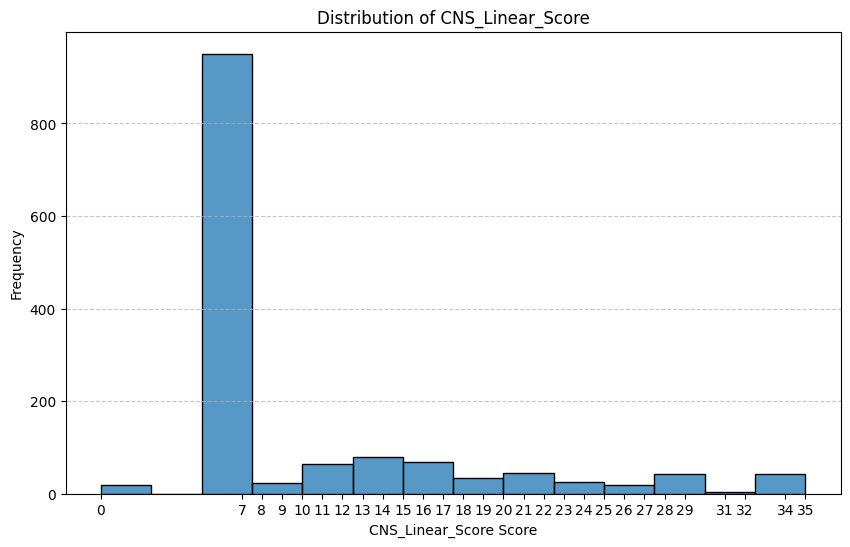

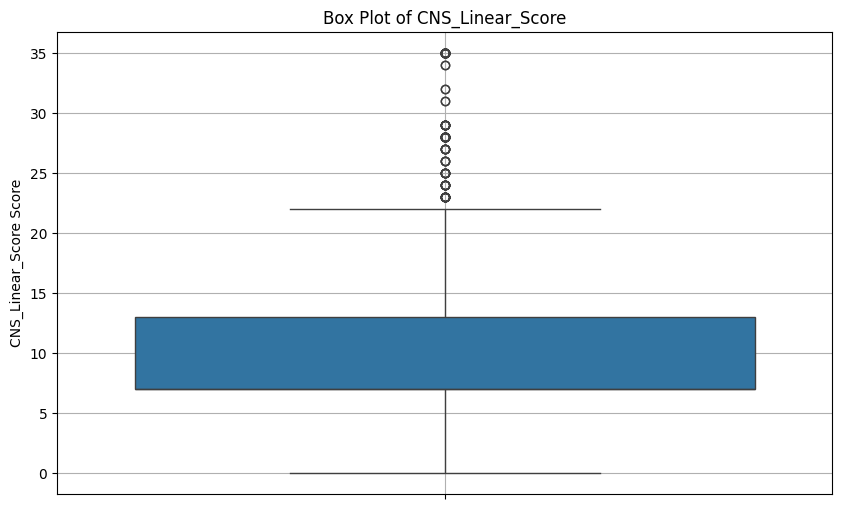

In [35]:
# Histogram for CNS_Linear_Score
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CNS_Linear_Score', bins=14, kde=False) # Bins based on unique values
plt.title('Distribution of CNS_Linear_Score')
plt.xlabel('CNS_Linear_Score Score')
plt.ylabel('Frequency')
plt.xticks(df['CNS_Linear_Score'].unique()) # Set ticks at unique values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Box plot for CNS_Linear_Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='CNS_Linear_Score')
plt.title('Box Plot of CNS_Linear_Score')
plt.ylabel('CNS_Linear_Score Score')
plt.grid(True)
plt.show()

###Disease_duration

In [36]:
df['Disease_duration'].describe()

,Disease_duration
count,1412.000000
mean,38.847734
std,33.350110
min,2.000000
25%,17.000000
50%,29.000000
75%,49.000000
max,235.000000


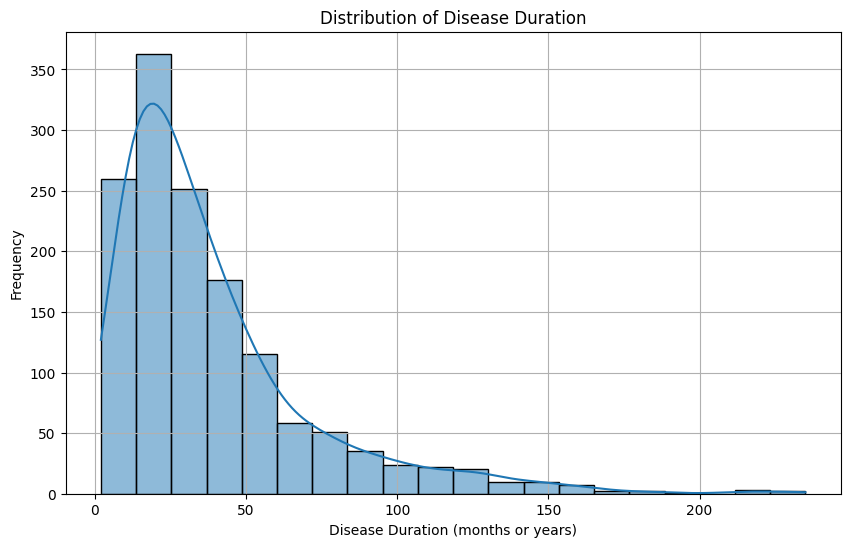

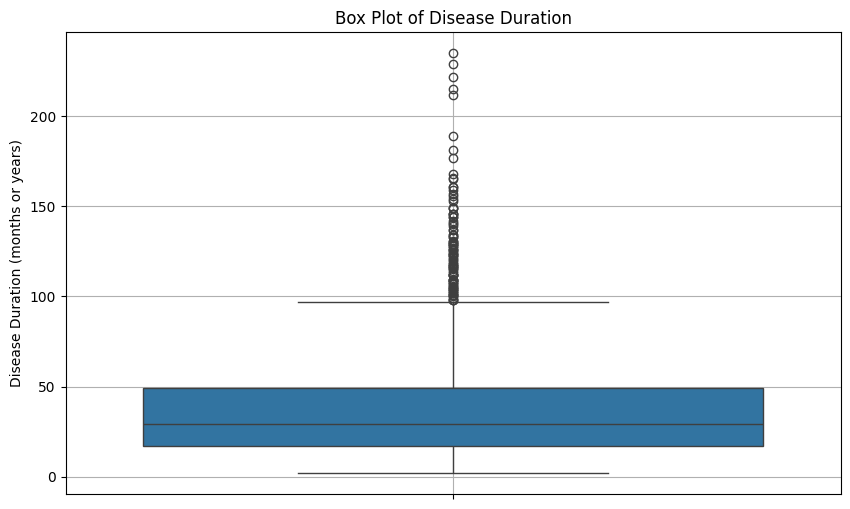

In [37]:
# Histogram for Disease_duration
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Disease_duration', bins=20, kde=True)
plt.title('Distribution of Disease Duration')
plt.xlabel('Disease Duration (months or years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for Disease_duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Disease_duration')
plt.title('Box Plot of Disease Duration')
plt.ylabel('Disease Duration (months or years)')
plt.grid(True)
plt.show()

###Progression_rate

In [38]:
df['Progression_rate'].describe()

,Progression_rate
count,1412.000000
mean,0.783689
std,0.841731
min,0.000000
25%,0.293897
50%,0.543168
75%,0.983333
max,11.333333


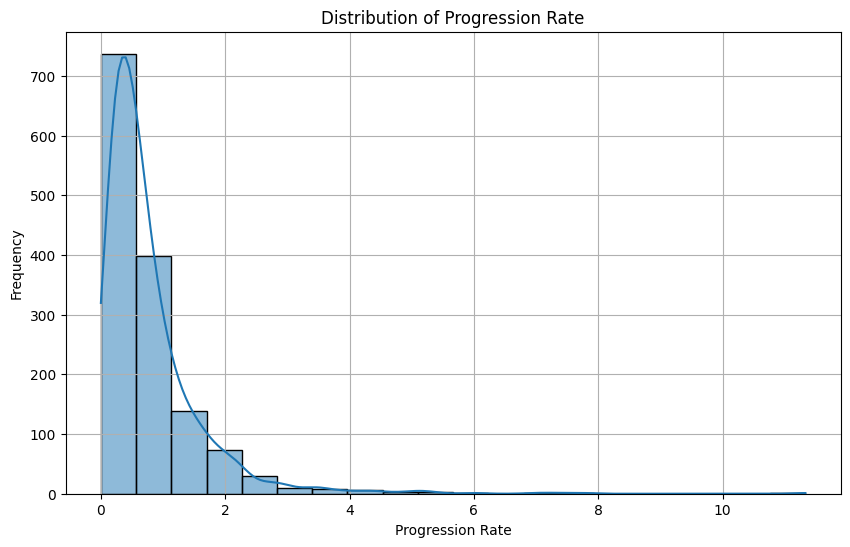

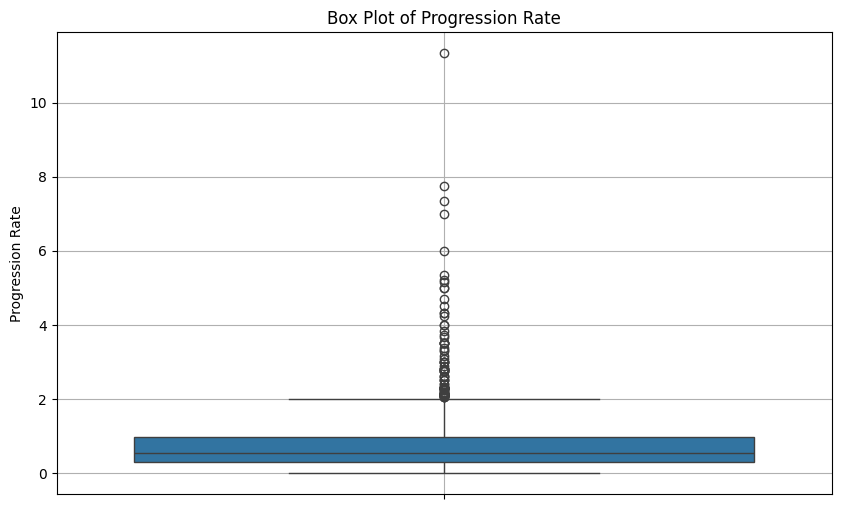

In [39]:
# Histogram for Progression_rate
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Progression_rate', bins=20, kde=True)
plt.title('Distribution of Progression Rate')
plt.xlabel('Progression Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for Progression_rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Progression_rate')
plt.title('Box Plot of Progression Rate')
plt.ylabel('Progression Rate')
plt.grid(True)
plt.show()

###ALSFRS_R

In [40]:
df['ALSFRS_R'].describe()

,ALSFRS_R
count,1412.000000
mean,29.804533
std,10.958528
min,0.000000
25%,23.000000
50%,32.000000
75%,38.000000
max,48.000000


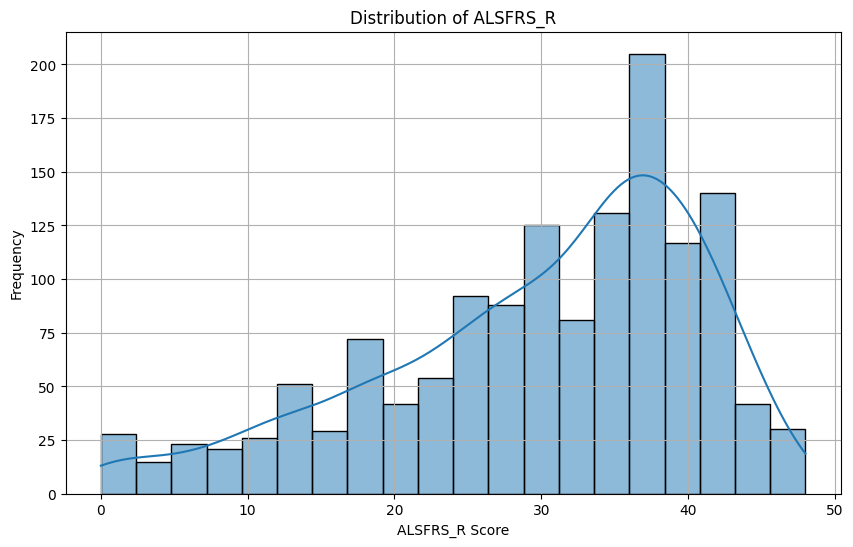

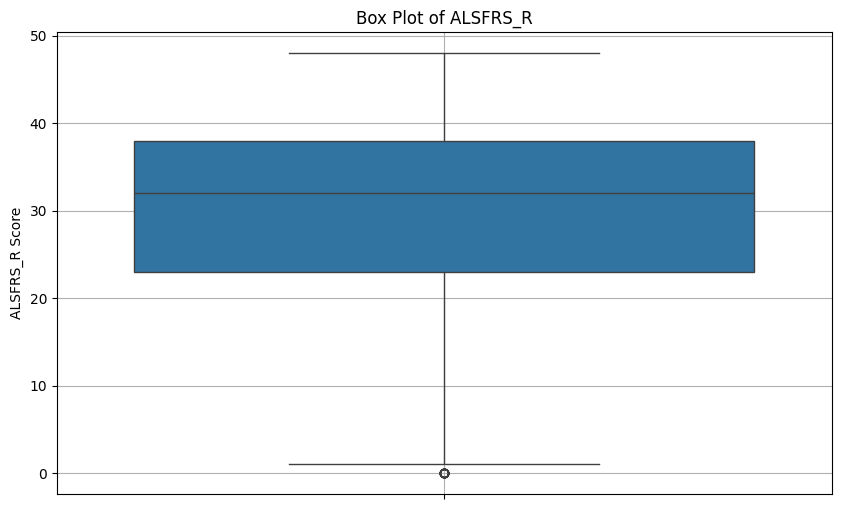

In [41]:
# Histogram for ALSFRS_R
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ALSFRS_R', bins=20, kde=True)
plt.title('Distribution of ALSFRS_R')
plt.xlabel('ALSFRS_R Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for ALSFRS_R
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='ALSFRS_R')
plt.title('Box Plot of ALSFRS_R')
plt.ylabel('ALSFRS_R Score')
plt.grid(True)
plt.show()

###ALSAQ_5

In [42]:
df['ALSAQ_5'].describe()

,ALSAQ_5
count,1412.000000
mean,47.163598
std,25.502257
min,0.000000
25%,30.000000
50%,45.000000
75%,65.000000
max,100.000000


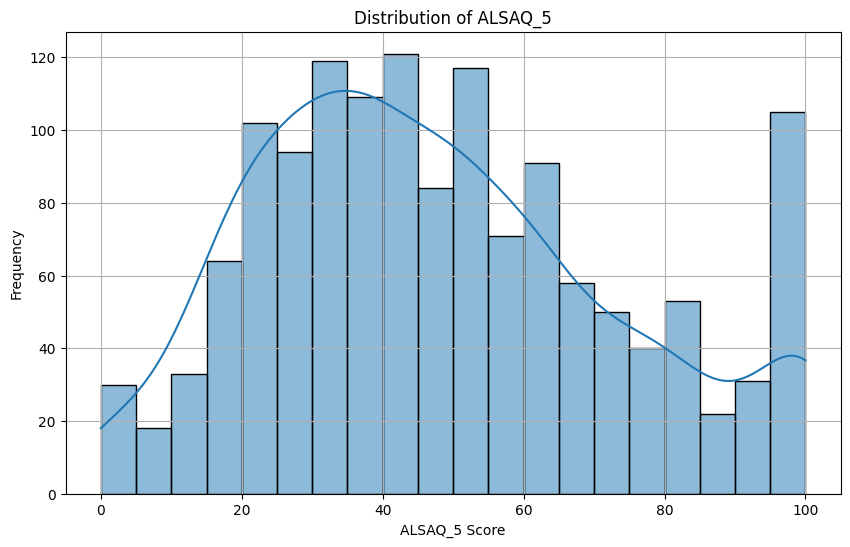

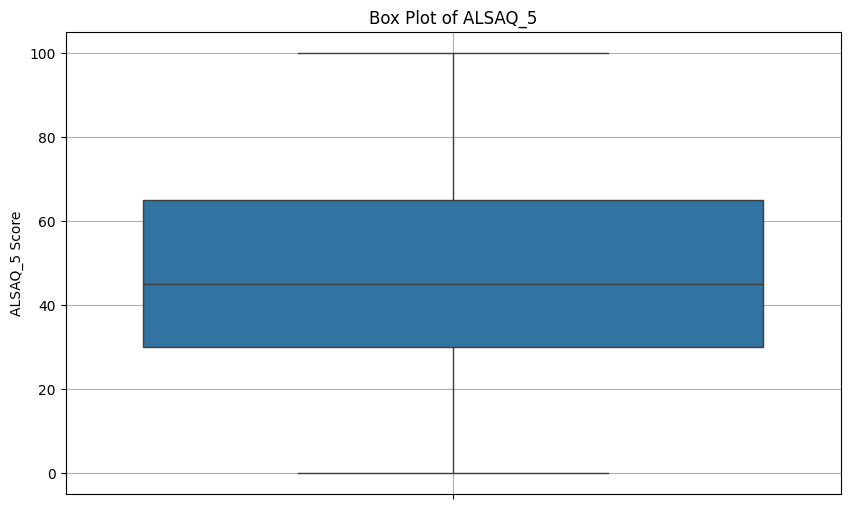

In [43]:
# Histogram for ALSAQ_5
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ALSAQ_5', bins=20, kde=True)
plt.title('Distribution of ALSAQ_5')
plt.xlabel('ALSAQ_5 Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for ALSAQ_5
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='ALSAQ_5')
plt.title('Box Plot of ALSAQ_5')
plt.ylabel('ALSAQ_5 Score')
plt.grid(True)
plt.show()

#Null Values Handling

##FVC

In [44]:
fvc_greater_than_80 = df[df['FVC'] == '>80']
fvc_60_to_80 = df[df['FVC'] == '60-80']
fvc_40_to_60 = df[df['FVC'] == '40-60']
fvc_less_than_40 = df[df['FVC'] == '<40']

In [45]:
# Create a new column for FVC categories in the main dataframe, excluding 'ND'
df['FVC_Category'] = pd.Categorical(df['FVC'].replace('ND', pd.NA), categories=['<40', '40-60', '60-80', '>80'], ordered=True)

# Display value counts for the new FVC_Category column
display(df['FVC_Category'].value_counts(dropna=False))

,count
FVC_Category,
>80,591
NaN,288
60-80,229
40-60,179
<40,125


In [46]:
display(df.groupby('FVC_Category')['ALSFRS_R'].describe())

/tmp/ipython-input-4158202987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('FVC_Category')['ALSFRS_R'].describe())


,count,mean,std,min,25%,50%,75%,max
FVC_Category,,,,,,,,
<40,125.0,21.592000,7.680197,0.0,17.0,21.0,26.0,43.0
40-60,179.0,27.234637,7.574404,4.0,22.0,28.0,32.0,43.0
60-80,229.0,31.004367,7.463653,8.0,27.0,32.0,36.0,45.0
>80,591.0,36.573604,6.061625,12.0,33.5,37.0,41.0,48.0


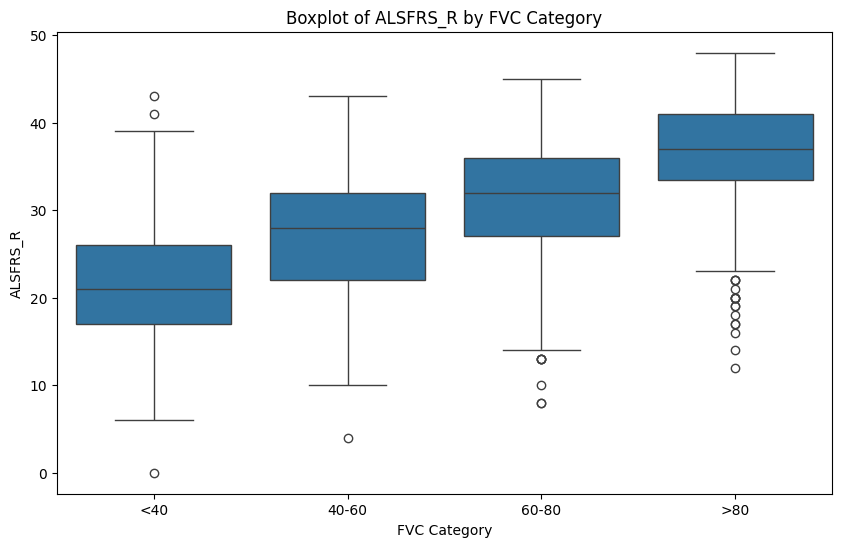

In [47]:
# Create a new column for FVC categories for plotting
df['FVC_Category'] = pd.Categorical(df['FVC'], categories=['<40', '40-60', '60-80', '>80'], ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FVC_Category', y='ALSFRS_R')
plt.title('Boxplot of ALSFRS_R by FVC Category')
plt.xlabel('FVC Category')
plt.ylabel('ALSFRS_R')
plt.show()

In [48]:
# Calculate the mean of 'ALSFRS_R' for each FVC category (excluding 'ND')
fvc_category_means = df.groupby('FVC_Category')['ALSFRS_R'].mean()

# Display the calculated means
display(fvc_category_means)

/tmp/ipython-input-3663909878.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fvc_category_means = df.groupby('FVC_Category')['ALSFRS_R'].mean()


,ALSFRS_R
FVC_Category,
<40,21.592000
40-60,27.234637
60-80,31.004367
>80,36.573604


In [49]:
# Identify rows where FVC is 'ND'
nd_fvc_rows = df[df['FVC'] == 'ND']

# Display the first few rows with 'ND' in FVC
display(nd_fvc_rows.head())

,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5,FVC_Category
2,1,3,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,1.0,3.0,2.0,7.0,4B,23.0,0.565217,35.0,25.0,NaN
4,1,5,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,1.0,4.0,0.0,7.0,4B,29.0,0.689655,28.0,50.0,NaN
8,1,9,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,0.0,ND,...,0.0,0.0,0.0,7.0,4B,55.0,0.854545,1.0,35.0,NaN
21,3,4,1946-01-03,2020-12-01,2021-12-10,0,75.0,spinale,0.0,ND,...,0.0,0.0,0.0,7.0,4B,22.0,1.590909,13.0,80.0,NaN
22,3,5,1946-01-03,2020-12-01,2021-12-10,0,75.0,spinale,0.0,ND,...,0.0,0.0,0.0,7.0,4B,41.0,0.902439,11.0,85.0,NaN


In [50]:
import numpy as np

# Create a dictionary of the mean ALSFRS_R for each FVC category
mean_alsfrs_r_by_fvc = df.groupby('FVC_Category')['ALSFRS_R'].mean().to_dict()

# Remove the NaN category from the dictionary if it exists
if np.nan in mean_alsfrs_r_by_fvc:
    del mean_alsfrs_r_by_fvc[np.nan]

# Define a function to find the nearest FVC category based on ALSFRS_R
def find_nearest_fvc_category(alsfrs_r_value, means_dict):
    if pd.isna(alsfrs_r_value):
        return np.nan  # Cannot impute if ALSFRS_R is also NaN
    distances = {category: abs(alsfrs_r_value - mean_val) for category, mean_val in means_dict.items()}
    return min(distances, key=distances.get)

# Apply the function to the rows where FVC is 'ND' to get the imputed category
imputed_categories = nd_fvc_rows['ALSFRS_R'].apply(lambda x: find_nearest_fvc_category(x, mean_alsfrs_r_by_fvc))

# Update the 'FVC' column in the original DataFrame with the imputed values
df.loc[nd_fvc_rows.index, 'FVC'] = imputed_categories

# Update the 'FVC_Category' column based on the updated 'FVC' column
df['FVC_Category'] = pd.Categorical(df['FVC'].replace('ND', pd.NA), categories=['<40', '40-60', '60-80', '>80'], ordered=True)

# Display value counts for the FVC_Category column to verify imputation
display(df['FVC_Category'].value_counts(dropna=False))

/tmp/ipython-input-4190061216.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_alsfrs_r_by_fvc = df.groupby('FVC_Category')['ALSFRS_R'].mean().to_dict()


,count
FVC_Category,
>80,664
<40,311
60-80,243
40-60,194


In [51]:
# Replace the original 'FVC' column with the imputed 'FVC_Category'
df['FVC'] = df['FVC_Category']

# Drop the 'FVC_Category' column
df = df.drop('FVC_Category', axis=1)

# Display the first few rows to confirm the changes
display(df.head())

,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,1,1,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,>80,...,11.0,4.0,4.0,0.0,7.0,3,14.0,0.785714,37.0,35.0
1,1,2,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,60-80,...,13.0,0.0,6.0,0.0,7.0,4B,19.0,0.684211,35.0,30.0
2,1,3,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,>80,...,12.0,1.0,3.0,2.0,7.0,4B,23.0,0.565217,35.0,25.0
3,1,4,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,40-60,...,12.0,4.0,5.0,0.0,7.0,4B,26.0,0.538462,34.0,45.0
4,1,5,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,40-60,...,11.0,1.0,4.0,0.0,7.0,4B,29.0,0.689655,28.0,50.0


In [52]:
# Check for remaining 'ND' values in the 'FVC' column
remaining_nd_fvc = df[df['FVC'] == 'ND']

# Display the rows with remaining 'ND' in FVC
display(remaining_nd_fvc)

,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5


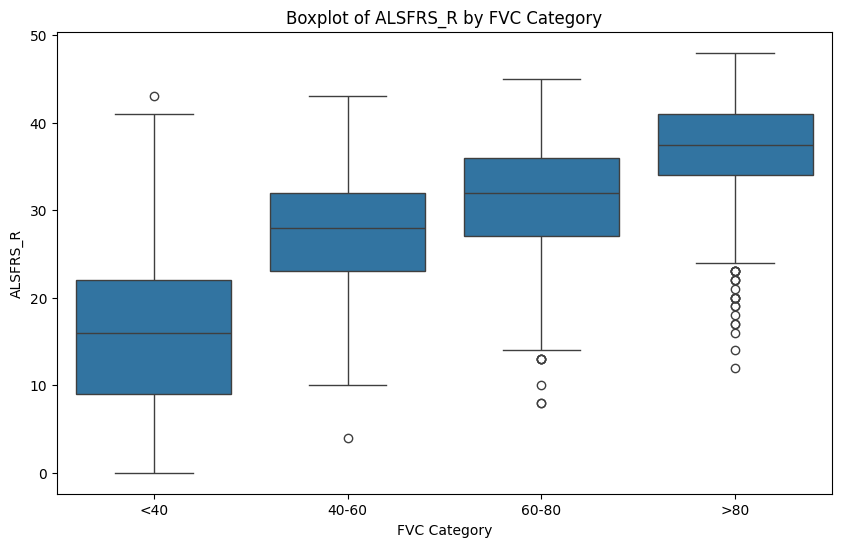

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FVC', y='ALSFRS_R', order=['<40', '40-60', '60-80', '>80'])
plt.title('Boxplot of ALSFRS_R by FVC Category')
plt.xlabel('FVC Category')
plt.ylabel('ALSFRS_R')
plt.show()

##Spirometry

In [54]:
# Filter the DataFrame for rows where 'Spirometry' is NaN
spirometry_nan_rows = df[df['Spirometry'].isna()]

# Display the 'FVC' column for these rows
display(spirometry_nan_rows['FVC'])

,FVC
2,>80
4,40-60
36,<40
108,>80
165,>80
201,<40
265,>80
295,>80
297,60-80
326,60-80


In [55]:
# Filter the DataFrame for rows where FVC is '>80'
fvc_greater_than_80_df = df[df['FVC'] == '>80']
spirometry_counts = fvc_greater_than_80_df['Spirometry'].value_counts(dropna=False)
print("Spirometry counts for FVC >80:")
print(spirometry_counts)

# Filter the DataFrame for rows where FVC is '60-80'
fvc_60_80_df = df[df['FVC'] == '60-80']
spirometry_counts = fvc_60_80_df['Spirometry'].value_counts(dropna=False)
print("\nSpirometry counts for FVC 60-80:")
print(spirometry_counts)

# Filter the DataFrame for rows where FVC is '40-60'
fvc_40_60_df = df[df['FVC'] == '40-60']
spirometry_counts = fvc_40_60_df['Spirometry'].value_counts(dropna=False)
print("\nSpirometry counts for FVC 40-60:")
print(spirometry_counts)


# Filter the DataFrame for rows where FVC is '<40'
fvc_less_than_40_df = df[df['FVC'] == '<40']
spirometry_counts = fvc_less_than_40_df['Spirometry'].value_counts(dropna=False)
print("\nSpirometry counts for FVC <40:")
print(spirometry_counts)

Spirometry counts for FVC >80:
Spirometry
1.0    591
0.0     61
NaN     12
Name: count, dtype: int64

Spirometry counts for FVC 60-80:
Spirometry
1.0    229
0.0     11
NaN      3
Name: count, dtype: int64

Spirometry counts for FVC 40-60:
Spirometry
1.0    179
0.0     13
NaN      2
Name: count, dtype: int64

Spirometry counts for FVC <40:
Spirometry
0.0    178
1.0    125
NaN      8
Name: count, dtype: int64


In [56]:
# Impute NaN values in 'Spirometry' based on 'FVC' categories
df.loc[df['FVC'].isin(['>80', '60-80', '40-60']) & df['Spirometry'].isna(), 'Spirometry'] = 1.0
df.loc[(df['FVC'] == '<40') & df['Spirometry'].isna(), 'Spirometry'] = 0.0

# Display the value counts for 'Spirometry' including NaN to check
display(df['Spirometry'].value_counts(dropna=False))

,count
Spirometry,
1.0,1141
0.0,271


In [57]:
display(df.isnull().sum())

,0
Patient_ID,0
Visit_ID,0
Date_of_birth,0
Symptom_onset_date,0
Diagnosis_date,0
Sex,0
Age_at_onset,0
Clinical_onset_type,0
Spirometry,0
FVC,0


#Target Variable Analysis

##Target Treatment Decision

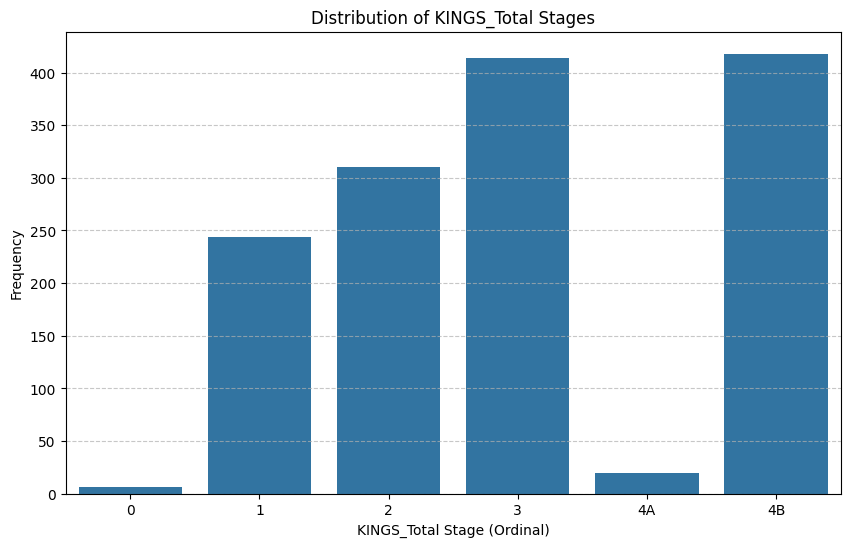

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='KINGS_Total', order=['0', '1', '2', '3', '4A', '4B'])
plt.title('Distribution of KINGS_Total Stages')
plt.xlabel('KINGS_Total Stage (Ordinal)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [62]:
df['KINGS_Total'] = df['KINGS_Total'].replace({'0': '1', '4A': '4B'})
df['KINGS_Total'] = df['KINGS_Total'].replace({'4B': '4'})
display(df['KINGS_Total'].value_counts())

,count
KINGS_Total,
4,438
3,414
2,310
1,250


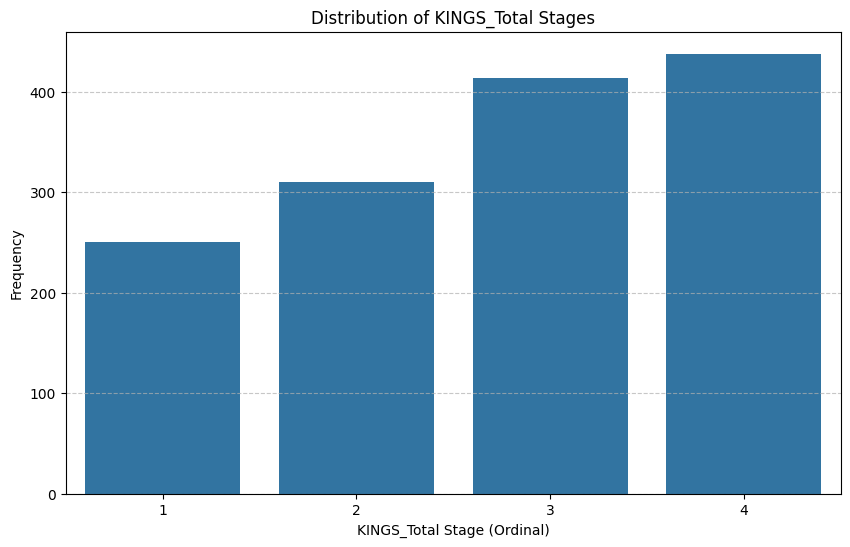

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='KINGS_Total', order=['1', '2', '3', '4'])
plt.title('Distribution of KINGS_Total Stages')
plt.xlabel('KINGS_Total Stage (Ordinal)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Target–Feature Relationship Analysis

###Categorical

####FVC

In [136]:
# Create a contingency table of 'Clinical_onset_type' and 'KINGS_Total'
contingency_table_onset = pd.crosstab(df['FVC'], df['KINGS_Total'])

# Perform the chi-squared test
chi2_onset, p_onset, dof_onset, expected_onset = chi2_contingency(contingency_table_onset)

# Print the results
print(f"Chi-squared statistic (FVC vs KINGS_Total): {chi2_onset}")
print(f"P-value (FVC vs KINGS_Total): {p_onset}")
print(f"Degrees of freedom (FVC vs KINGS_Total): {dof_onset}")
print("Expected frequencies (FVC vs KINGS_Total):")
display(expected_onset)

Chi-squared statistic (FVC vs KINGS_Total): 539.3240027295641
P-value (FVC vs KINGS_Total): 2.163506069446573e-110
Degrees of freedom (FVC vs KINGS_Total): 9
Expected frequencies (FVC vs KINGS_Total):


array([[ 34.34844193,  42.59206799,  56.88101983,  60.17847025],
       [ 43.02407932,  53.34985836,  71.24787535,  75.37818697],
       [ 55.06373938,  68.27903683,  91.18555241,  96.47167139],
       [117.56373938, 145.77903683, 194.68555241, 205.97167139]])

####Clinical_onset_type

In [59]:
# Create a contingency table of 'Clinical_onset_type' and 'KINGS_Total'
contingency_table_onset = pd.crosstab(df['Clinical_onset_type'], df['KINGS_Total'])

# Perform the chi-squared test
chi2_onset, p_onset, dof_onset, expected_onset = chi2_contingency(contingency_table_onset)

# Print the results
print(f"Chi-squared statistic (Clinical Onset Type vs KINGS_Total): {chi2_onset}")
print(f"P-value (Clinical Onset Type vs KINGS_Total): {p_onset:.30f}")
print(f"Degrees of freedom (Clinical Onset Type vs KINGS_Total): {dof_onset}")
print("Expected frequencies (Clinical Onset Type vs KINGS_Total):")
display(expected_onset)

Chi-squared statistic (Clinical Onset Type vs KINGS_Total): 44.55518319466093
P-value (Clinical Onset Type vs KINGS_Total): 0.000001114934283410840272190078
Degrees of freedom (Clinical Onset Type vs KINGS_Total): 9
Expected frequencies (Clinical Onset Type vs KINGS_Total):


array([[ 47.62747875,  59.05807365,  78.87110482,  83.44334278],
       [  1.59348442,   1.97592068,   2.6388102 ,   2.7917847 ],
       [  3.71813031,   4.61048159,   6.1572238 ,   6.51416431],
       [197.06090652, 244.35552408, 326.33286119, 345.25070822]])

####Tracheostomy

In [60]:
# Create a contingency table of 'Tracheostomy' and 'KINGS_Total'
contingency_table = pd.crosstab(df['Tracheostomy'], df['KINGS_Total'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p:.30f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
display(expected)

Chi-squared statistic: 104.1065895907723
P-value: 0.000000000000000000000203391876
Degrees of freedom: 3
Expected frequencies:


array([[216.5368272 , 268.50566572, 358.58498584, 379.37252125],
       [ 33.4631728 ,  41.49433428,  55.41501416,  58.62747875]])

####Family_history

In [61]:
# Create a contingency table of 'Family_history' and 'KINGS_Total'
contingency_table_family = pd.crosstab(df['Family_history'], df['KINGS_Total'])

# Perform the chi-squared test
chi2_family, p_family, dof_family, expected_family = chi2_contingency(contingency_table_family)

# Print the results
print(f"Chi-squared statistic (Family History vs KINGS_Total): {chi2_family}")
print(f"P-value (Family History vs KINGS_Total): {p_family:.30f}")
print(f"Degrees of freedom (Family History vs KINGS_Total): {dof_family}")
print("Expected frequencies (Family History vs KINGS_Total):")
display(expected_family)

Chi-squared statistic (Family History vs KINGS_Total): 6.180629555451329
P-value (Family History vs KINGS_Total): 0.103145383394498246776294081428
Degrees of freedom (Family History vs KINGS_Total): 3
Expected frequencies (Family History vs KINGS_Total):


array([[198.83144476, 246.5509915 , 329.26487252, 348.35269122],
       [ 51.16855524,  63.4490085 ,  84.73512748,  89.64730878]])

####Therapy

In [62]:
# Create a contingency table of 'Therapy' and 'KINGS_Total'
contingency_table_therapy = pd.crosstab(df['Therapy'], df['KINGS_Total'])

# Perform the chi-squared test
chi2_therapy, p_therapy, dof_therapy, expected_therapy = chi2_contingency(contingency_table_therapy)

# Print the results
print(f"Chi-squared statistic (Therapy vs KINGS_Total): {chi2_therapy}")
print(f"P-value (Therapy vs KINGS_Total): {p_therapy:.30f}")
print(f"Degrees of freedom (Therapy vs KINGS_Total): {dof_therapy}")
print("Expected frequencies (Therapy vs KINGS_Total):")
display(expected_therapy)

Chi-squared statistic (Therapy vs KINGS_Total): 77.46773208315172
P-value (Therapy vs KINGS_Total): 0.000000000000513744033500905864
Degrees of freedom (Therapy vs KINGS_Total): 9
Expected frequencies (Therapy vs KINGS_Total):


array([[ 20.00708215,  24.80878187,  33.13172805,  35.05240793],
       [173.6898017 , 215.37535411, 287.63031161, 304.30453258],
       [  8.32152975,  10.31869688,  13.78045326,  14.57932011],
       [ 47.9815864 ,  59.49716714,  79.45750708,  84.06373938]])

####Ventilation

In [63]:
# Create a contingency table of 'Ventilation' and 'KINGS_Total'
contingency_table_ventilation = pd.crosstab(df['Ventilation'], df['KINGS_Total'])

# Perform the chi-squared test
chi2_ventilation, p_ventilation, dof_ventilation, expected_ventilation = chi2_contingency(contingency_table_ventilation)

# Print the results
print(f"Chi-squared statistic (Ventilation vs KINGS_Total): {chi2_ventilation}")
print(f"P-value (Ventilation vs KINGS_Total): {p_ventilation}")
print(f"Degrees of freedom (Ventilation vs KINGS_Total): {dof_ventilation}")
print("Expected frequencies (Ventilation vs KINGS_Total):")
display(expected_ventilation)

Chi-squared statistic (Ventilation vs KINGS_Total): 804.9393591729855
P-value (Ventilation vs KINGS_Total): 3.6728162442856954e-174
Degrees of freedom (Ventilation vs KINGS_Total): 3
Expected frequencies (Ventilation vs KINGS_Total):


array([[151.20396601, 187.49291785, 250.39376771, 264.90934844],
       [ 98.79603399, 122.50708215, 163.60623229, 173.09065156]])

####PEG

In [64]:
# Create a contingency table of 'PEG' and 'KINGS_Total'
contingency_table_peg = pd.crosstab(df['PEG'], df['KINGS_Total'])

# Perform the chi-squared test
chi2_peg, p_peg, dof_peg, expected_peg = chi2_contingency(contingency_table_peg)

# Print the results
print(f"Chi-squared statistic (PEG vs KINGS_Total): {chi2_peg}")
print(f"P-value (PEG vs KINGS_Total): {p_peg}")
print(f"Degrees of freedom (PEG vs KINGS_Total): {dof_peg}")
print("Expected frequencies (PEG vs KINGS_Total):")
display(expected_peg)

Chi-squared statistic (PEG vs KINGS_Total): 179.4807417017052
P-value (PEG vs KINGS_Total): 1.1418286795184084e-38
Degrees of freedom (PEG vs KINGS_Total): 3
Expected frequencies (PEG vs KINGS_Total):


array([[234.24220963, 290.46033994, 387.90509915, 410.39235127],
       [ 15.75779037,  19.53966006,  26.09490085,  27.60764873]])

###Numerical

####Age_at_onset

In [65]:
# Drop rows with missing values in 'Age_at_onset' or 'KINGS_Total'
df_anova = df.dropna(subset=['Age_at_onset', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_anova['KINGS_Total'] = df_anova['KINGS_Total'].astype(str)

# Create a list of Age_at_onset values for each KINGS_Total group
groups = df_anova.groupby('KINGS_Total')['Age_at_onset'].apply(list)

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*groups)

# Print the results
print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA P-value: {p_value}")

ANOVA F-statistic: 16.50482820109437
ANOVA P-value: 1.5252541822321678e-10


####Diagnostic_delay

In [66]:
# Drop rows with missing values in 'Diagnostic_delay' or 'KINGS_Total'
df_kruskal = df.dropna(subset=['Diagnostic_delay', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal['KINGS_Total'] = df_kruskal['KINGS_Total'].astype(str)

# Create a list of Diagnostic_delay values for each KINGS_Total group
groups_kruskal = df_kruskal.groupby('KINGS_Total')['Diagnostic_delay'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic, p_value_kruskal = stats.kruskal(*groups_kruskal)

# Print the results
print(f"Kruskal-Wallis statistic: {kruskal_statistic}")
print(f"Kruskal-Wallis P-value: {p_value_kruskal}")

Kruskal-Wallis statistic: 10.90320461535949
Kruskal-Wallis P-value: 0.012260966538893553


####MRC_Upper_Limb

In [67]:
# Drop rows with missing values in 'MRC_Upper_Limb' or 'KINGS_Total'
df_kruskal_mrc_upper = df.dropna(subset=['MRC_Upper_Limb', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_mrc_upper['KINGS_Total'] = df_kruskal_mrc_upper['KINGS_Total'].astype(str)

# Create a list of MRC_Upper_Limb values for each KINGS_Total group
groups_kruskal_mrc_upper = df_kruskal_mrc_upper.groupby('KINGS_Total')['MRC_Upper_Limb'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_mrc_upper, p_value_kruskal_mrc_upper = stats.kruskal(*groups_kruskal_mrc_upper)

# Print the results
print(f"Kruskal-Wallis statistic (MRC_Upper_Limb vs KINGS_Total): {kruskal_statistic_mrc_upper}")
print(f"Kruskal-Wallis P-value (MRC_Upper_Limb vs KINGS_Total): {p_value_kruskal_mrc_upper}")

Kruskal-Wallis statistic (MRC_Upper_Limb vs KINGS_Total): 267.99715602805645
Kruskal-Wallis P-value (MRC_Upper_Limb vs KINGS_Total): 8.370929508579847e-58


####MRC_Lower_Limb

In [68]:
# Drop rows with missing values in 'MRC_Lower_Limb' or 'KINGS_Total'
df_kruskal_mrc_lower = df.dropna(subset=['MRC_Lower_Limb', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_mrc_lower['KINGS_Total'] = df_kruskal_mrc_lower['KINGS_Total'].astype(str)

# Create a list of MRC_Lower_Limb values for each KINGS_Total group
groups_kruskal_mrc_lower = df_kruskal_mrc_lower.groupby('KINGS_Total')['MRC_Lower_Limb'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_mrc_lower, p_value_kruskal_mrc_lower = stats.kruskal(*groups_kruskal_mrc_lower)

# Print the results
print(f"Kruskal-Wallis statistic (MRC_Lower_Limb vs KINGS_Total): {kruskal_statistic_mrc_lower}")
print(f"Kruskal-Wallis P-value (MRC_Lower_Limb vs KINGS_Total): {p_value_kruskal_mrc_lower}")

Kruskal-Wallis statistic (MRC_Lower_Limb vs KINGS_Total): 145.06633744944975
Kruskal-Wallis P-value (MRC_Lower_Limb vs KINGS_Total): 3.0544418349402766e-31


####MRC_Bulbar

In [69]:
# Drop rows with missing values in 'MRC_Bulbar' or 'KINGS_Total'
df_kruskal_mrc_bulbar = df.dropna(subset=['MRC_Bulbar', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_mrc_bulbar['KINGS_Total'] = df_kruskal_mrc_bulbar['KINGS_Total'].astype(str)

# Create a list of MRC_Bulbar values for each KINGS_Total group
groups_kruskal_mrc_bulbar = df_kruskal_mrc_bulbar.groupby('KINGS_Total')['MRC_Bulbar'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_mrc_bulbar, p_value_kruskal_mrc_bulbar = stats.kruskal(*groups_kruskal_mrc_bulbar)

# Print the results
print(f"Kruskal-Wallis statistic (MRC_Bulbar vs KINGS_Total): {kruskal_statistic_mrc_bulbar}")
print(f"Kruskal-Wallis P-value (MRC_Bulbar vs KINGS_Total): {p_value_kruskal_mrc_bulbar}")

Kruskal-Wallis statistic (MRC_Bulbar vs KINGS_Total): 435.63287574568426
Kruskal-Wallis P-value (MRC_Bulbar vs KINGS_Total): 4.226850296361926e-94


####PUMNS_Upper_Limb

In [70]:
# Drop rows with missing values in 'PUMNS_Upper_Limb' or 'KINGS_Total'
df_kruskal_pumns_upper = df.dropna(subset=['PUMNS_Upper_Limb', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_pumns_upper['KINGS_Total'] = df_kruskal_pumns_upper['KINGS_Total'].astype(str)

# Create a list of PUMNS_Upper_Limb values for each KINGS_Total group
groups_kruskal_pumns_upper = df_kruskal_pumns_upper.groupby('KINGS_Total')['PUMNS_Upper_Limb'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_pumns_upper, p_value_kruskal_pumns_upper = stats.kruskal(*groups_kruskal_pumns_upper)

# Print the results
print(f"Kruskal-Wallis statistic (PUMNS_Upper_Limb vs KINGS_Total): {kruskal_statistic_pumns_upper}")
print(f"Kruskal-Wallis P-value (PUMNS_Upper_Limb vs KINGS_Total): {p_value_kruskal_pumns_upper}")

Kruskal-Wallis statistic (PUMNS_Upper_Limb vs KINGS_Total): 136.460476781083
Kruskal-Wallis P-value (PUMNS_Upper_Limb vs KINGS_Total): 2.1906639998312247e-29


####PUMNS_Lower_Limb

In [71]:
# Drop rows with missing values in 'PUMNS_Lower_Limb' or 'KINGS_Total'
df_kruskal_pumns_lower = df.dropna(subset=['PUMNS_Lower_Limb', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_pumns_lower['KINGS_Total'] = df_kruskal_pumns_lower['KINGS_Total'].astype(str)

# Create a list of PUMNS_Lower_Limb values for each KINGS_Total group
groups_kruskal_pumns_lower = df_kruskal_pumns_lower.groupby('KINGS_Total')['PUMNS_Lower_Limb'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_pumns_lower, p_value_kruskal_pumns_lower = stats.kruskal(*groups_kruskal_pumns_lower)

# Print the results
print(f"Kruskal-Wallis statistic (PUMNS_Lower_Limb vs KINGS_Total): {kruskal_statistic_pumns_lower}")
print(f"Kruskal-Wallis P-value (PUMNS_Lower_Limb vs KINGS_Total): {p_value_kruskal_pumns_lower}")

Kruskal-Wallis statistic (PUMNS_Lower_Limb vs KINGS_Total): 98.91547124547465
Kruskal-Wallis P-value (PUMNS_Lower_Limb vs KINGS_Total): 2.6587429225803685e-21


####PUMNS_Bulbar

In [72]:
# Drop rows with missing values in 'PUMNS_Bulbar' or 'KINGS_Total'
df_kruskal_pumns_bulbar = df.dropna(subset=['PUMNS_Bulbar', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_pumns_bulbar['KINGS_Total'] = df_kruskal_pumns_bulbar['KINGS_Total'].astype(str)

# Create a list of PUMNS_Bulbar values for each KINGS_Total group
groups_kruskal_pumns_bulbar = df_kruskal_pumns_bulbar.groupby('KINGS_Total')['PUMNS_Bulbar'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_pumns_bulbar, p_value_kruskal_pumns_bulbar = stats.kruskal(*groups_kruskal_pumns_bulbar)

# Print the results
print(f"Kruskal-Wallis statistic (PUMNS_Bulbar vs KINGS_Total): {kruskal_statistic_pumns_bulbar}")
print(f"Kruskal-Wallis P-value (PUMNS_Bulbar vs KINGS_Total): {p_value_kruskal_pumns_bulbar}")

Kruskal-Wallis statistic (PUMNS_Bulbar vs KINGS_Total): 109.17312967316118
Kruskal-Wallis P-value (PUMNS_Bulbar vs KINGS_Total): 1.653022687137752e-23


####CNS_Linear_Score

In [73]:
# Drop rows with missing values in 'CNS_Linear_Score' or 'KINGS_Total'
df_kruskal_cns = df.dropna(subset=['CNS_Linear_Score', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_cns['KINGS_Total'] = df_kruskal_cns['KINGS_Total'].astype(str)

# Create a list of CNS_Linear_Score values for each KINGS_Total group
groups_kruskal_cns = df_kruskal_cns.groupby('KINGS_Total')['CNS_Linear_Score'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_cns, p_value_kruskal_cns = stats.kruskal(*groups_kruskal_cns)

# Print the results
print(f"Kruskal-Wallis statistic (CNS_Linear_Score vs KINGS_Total): {kruskal_statistic_cns}")
print(f"Kruskal-Wallis P-value (CNS_Linear_Score vs KINGS_Total): {p_value_kruskal_cns}")

Kruskal-Wallis statistic (CNS_Linear_Score vs KINGS_Total): 111.57570559820996
Kruskal-Wallis P-value (CNS_Linear_Score vs KINGS_Total): 5.0258509393997625e-24


####Disease_duration

In [74]:
# Drop rows with missing values in 'Disease_duration' or 'KINGS_Total'
df_kruskal_disease_duration = df.dropna(subset=['Disease_duration', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_disease_duration['KINGS_Total'] = df_kruskal_disease_duration['KINGS_Total'].astype(str)

# Create a list of Disease_duration values for each KINGS_Total group
groups_kruskal_disease_duration = df_kruskal_disease_duration.groupby('KINGS_Total')['Disease_duration'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_disease_duration, p_value_kruskal_disease_duration = stats.kruskal(*groups_kruskal_disease_duration)

# Print the results
print(f"Kruskal-Wallis statistic (Disease_duration vs KINGS_Total): {kruskal_statistic_disease_duration}")
print(f"Kruskal-Wallis P-value (Disease_duration vs KINGS_Total): {p_value_kruskal_disease_duration}")

Kruskal-Wallis statistic (Disease_duration vs KINGS_Total): 49.61521365417467
Kruskal-Wallis P-value (Disease_duration vs KINGS_Total): 9.648138078264784e-11


####Progression_rate

In [75]:
# Drop rows with missing values in 'Progression_rate' or 'KINGS_Total'
df_kruskal_progression_rate = df.dropna(subset=['Progression_rate', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_progression_rate['KINGS_Total'] = df_kruskal_progression_rate['KINGS_Total'].astype(str)

# Create a list of Progression_rate values for each KINGS_Total group
groups_kruskal_progression_rate = df_kruskal_progression_rate.groupby('KINGS_Total')['Progression_rate'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_progression_rate, p_value_kruskal_progression_rate = stats.kruskal(*groups_kruskal_progression_rate)

# Print the results
print(f"Kruskal-Wallis statistic (Progression_rate vs KINGS_Total): {kruskal_statistic_progression_rate}")
print(f"Kruskal-Wallis P-value (Progression_rate vs KINGS_Total): {p_value_kruskal_progression_rate}")

Kruskal-Wallis statistic (Progression_rate vs KINGS_Total): 258.8050040088638
Kruskal-Wallis P-value (Progression_rate vs KINGS_Total): 8.1527155118775095e-56


####ALSFRS_R

In [76]:
# Drop rows with missing values in 'ALSFRS_R' or 'KINGS_Total'
df_kruskal_alsfrs_r = df.dropna(subset=['ALSFRS_R', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_alsfrs_r['KINGS_Total'] = df_kruskal_alsfrs_r['KINGS_Total'].astype(str)

# Create a list of ALSFRS_R values for each KINGS_Total group
groups_kruskal_alsfrs_r = df_kruskal_alsfrs_r.groupby('KINGS_Total')['ALSFRS_R'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_alsfrs_r, p_value_kruskal_alsfrs_r = stats.kruskal(*groups_kruskal_alsfrs_r)

# Print the results
print(f"Kruskal-Wallis statistic (ALSFRS_R vs KINGS_Total): {kruskal_statistic_alsfrs_r}")
print(f"Kruskal-Wallis P-value (ALSFRS_R vs KINGS_Total): {p_value_kruskal_alsfrs_r}")

Kruskal-Wallis statistic (ALSFRS_R vs KINGS_Total): 931.0483852638702
Kruskal-Wallis P-value (ALSFRS_R vs KINGS_Total): 1.6304363262375495e-201


####ALSAQ_5

In [77]:
# Drop rows with missing values in 'ALSAQ_5' or 'KINGS_Total'
df_kruskal_alsaq5 = df.dropna(subset=['ALSAQ_5', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_alsaq5['KINGS_Total'] = df_kruskal_alsaq5['KINGS_Total'].astype(str)

# Create a list of ALSAQ_5 values for each KINGS_Total group
groups_kruskal_alsaq5 = df_kruskal_alsaq5.groupby('KINGS_Total')['ALSAQ_5'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_alsaq5, p_value_kruskal_alsaq5 = stats.kruskal(*groups_kruskal_alsaq5)

# Print the results
print(f"Kruskal-Wallis statistic (ALSAQ_5 vs KINGS_Total): {kruskal_statistic_alsaq5}")
print(f"Kruskal-Wallis P-value (ALSAQ_5 vs KINGS_Total): {p_value_kruskal_alsaq5}")

Kruskal-Wallis statistic (ALSAQ_5 vs KINGS_Total): 553.5185391450517
Kruskal-Wallis P-value (ALSAQ_5 vs KINGS_Total): 1.2002315755959689e-119


#EDA

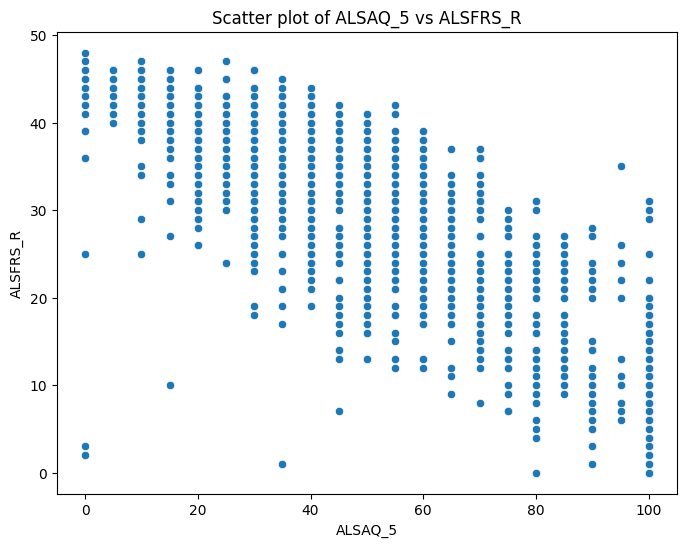

In [78]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ALSAQ_5', y='ALSFRS_R')
plt.title('Scatter plot of ALSAQ_5 vs ALSFRS_R')
plt.xlabel('ALSAQ_5')
plt.ylabel('ALSFRS_R')
plt.show()

This scatter plot shows a strong, clear connection between patient function and quality of life.

It reveals a negative correlation: as the ALSAQ-5 score on the x-axis increases, the ALSFRS-R score on the y-axis decreases.

High ALSAQ-5 Score = Poorer quality of life.

High ALSFRS-R Score = Better physical function.

In simple terms, the plot demonstrates that as a patient's reported quality of life gets worse, their physical function also declines.

In [79]:
import plotly.express as px

fig = px.scatter(df, x='Progression_rate', y='ALSFRS_R',
                 title='Progression Rate vs ALSFRS_R (Interactive Plotly)')
fig.show()

This graph shows the link between how fast the disease is worsening (Progression_rate) and the patient's current physical ability (ALSFRS_R).

The main takeaway is a downward trend:

Fast Progression (higher numbers on the bottom axis) is linked to worse physical ability (lower numbers on the side axis).

Slow Progression (lower numbers on the bottom axis) is seen in patients with all levels of physical ability, from high to low.

In [80]:
df.columns

Index(['Patient_ID', 'Visit_ID', 'Date_of_birth', 'Symptom_onset_date',
       'Diagnosis_date', 'Sex', 'Age_at_onset', 'Clinical_onset_type',
       'Spirometry', 'FVC', 'Ventilation', 'Tracheostomy', 'PEG',
       'Family_history', 'Therapy', 'Diagnostic_delay', 'MRC_Upper_Limb',
       'MRC_Lower_Limb', 'MRC_Bulbar', 'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb',
       'PUMNS_Bulbar', 'CNS_Linear_Score', 'KINGS_Total', 'Disease_duration',
       'Progression_rate', 'ALSFRS_R', 'ALSAQ_5'],
      dtype='object')

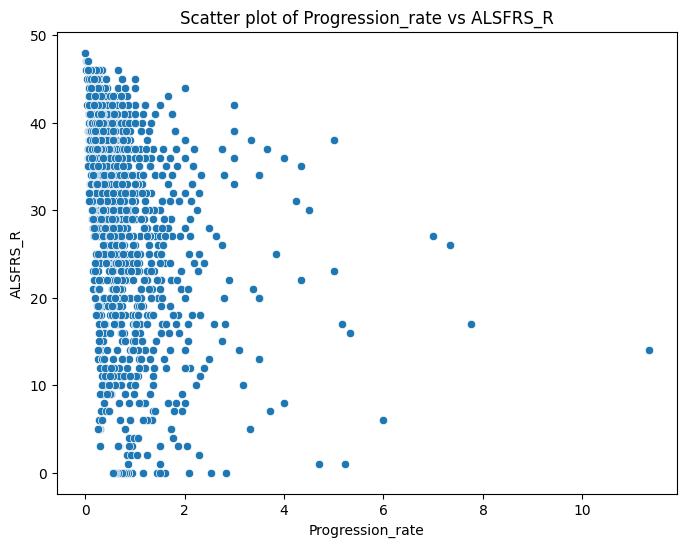

In [81]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Progression_rate', y='ALSFRS_R')
plt.title('Scatter plot of Progression_rate vs ALSFRS_R')
plt.xlabel('Progression_rate')
plt.ylabel('ALSFRS_R')
plt.show()

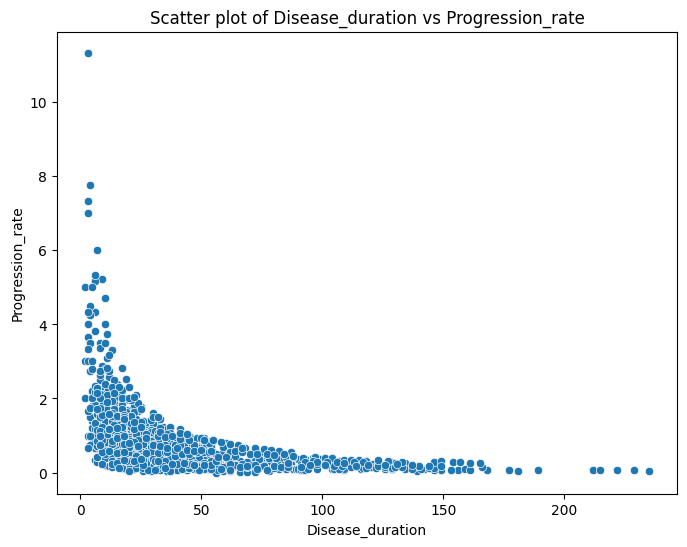

In [82]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Disease_duration', y='Progression_rate')
plt.title('Scatter plot of Disease_duration vs Progression_rate')
plt.xlabel('Disease_duration')
plt.ylabel('Progression_rate')
plt.show()

This graph shows how the length of time a patient has had the disease is related to the speed at which their disease gets worse.

The key takeaway is an inverse relationship:

Short Disease Duration (left side of the graph) is often linked to a High Progression Rate.

Long Disease Duration (right side of the graph) is always linked to a Low Progression Rate.

In simple terms, patients whose disease progresses very quickly don't live with the disease for a long time. Patients who have lived with the disease for many years are those whose illness progresses very slowly.

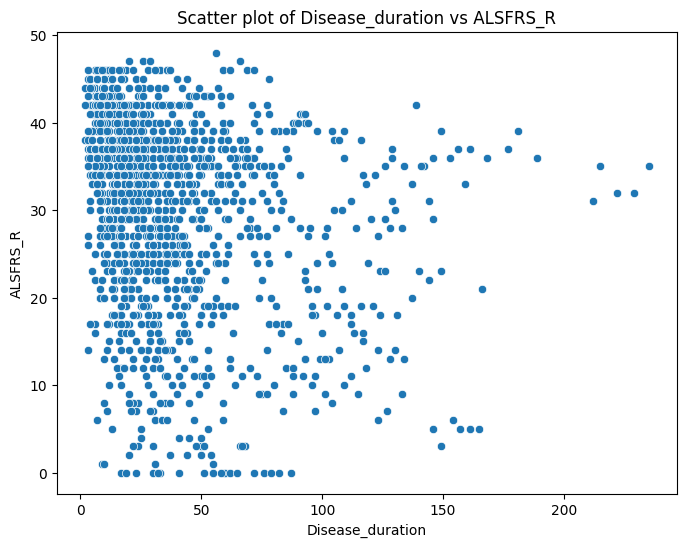

In [83]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Disease_duration', y='ALSFRS_R')
plt.title('Scatter plot of Disease_duration vs ALSFRS_R')
plt.xlabel('Disease_duration')
plt.ylabel('ALSFRS_R')
plt.show()

In [84]:
fig = px.scatter_3d(df, x='Disease_duration', y='Progression_rate', z='ALSFRS_R',
                    color="Progression_rate", title='3D Scatter Plot of Disease Duration, Progression Rate, and ALSFRS_R (Interactive Plotly)')
fig.show()

This 3D graph combines three key factors to give a complete picture of the disease:

Progression Rate: How fast the disease worsens.

Disease Duration: How long the patient has had the disease.

ALSFRS_R: The patient's current physical function.

The data points form a shape that looks like a curved wall or a wedge, which reveals three key things at once:

Patients with good physical function (high on the ALSFRS_R axis) are only seen early in the disease and with a slow progression rate.

Patients with a fast-progressing disease always have poor physical function and a short disease duration.

Patients who have had the disease for a long time are always those with a slow progression rate.

In short, the plot shows that these three factors are tightly linked and confirms that the most aggressive forms of the disease lead to rapid functional decline and shorter survival.

In [85]:
df = df.sort_values(by='KINGS_Total')
display(df.head())

,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
744,133,3,1998-10-08,2018-03-01,2020-12-01,0,19.0,spinale,1.0,>80,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
452,79,1,1955-12-12,2021-01-01,2022-03-01,0,65.0,spinale,1.0,40-60,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
455,81,1,1945-02-18,2024-01-01,2024-07-11,1,79.0,bulbare,1.0,>80,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
1173,214,1,1966-03-16,2017-05-01,2018-11-01,0,51.0,spinale,1.0,>80,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
1174,214,2,1966-03-16,2017-05-01,2018-11-01,0,51.0,spinale,1.0,>80,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


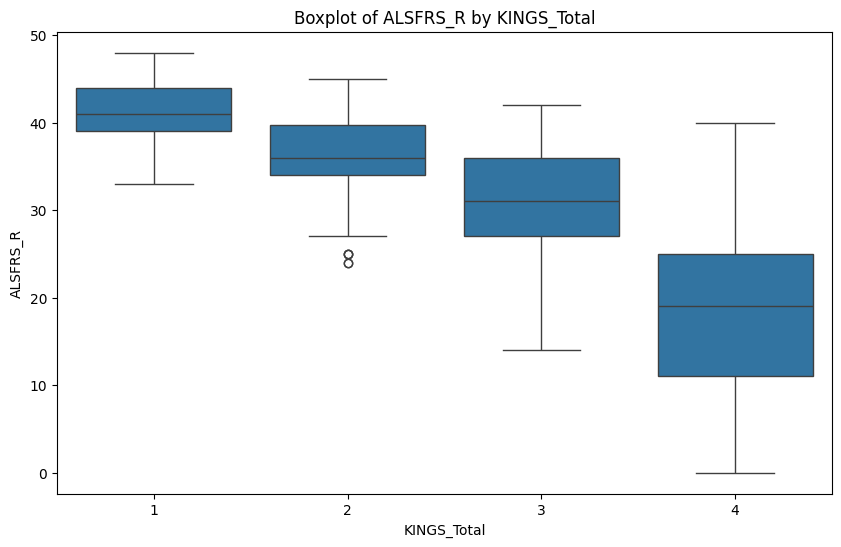

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='KINGS_Total', y='ALSFRS_R')
plt.title('Boxplot of ALSFRS_R by KINGS_Total')
plt.xlabel('KINGS_Total')
plt.ylabel('ALSFRS_R')
plt.show()


This graph shows how a patient's physical function (ALSFRS_R) changes across the different King's disease stages (KINGS_Total).

The trend is very clear:

Stage 1 patients have the highest physical function scores.

As the stage increases to 2, 3, and 4, the average physical function score consistently drops.

By Stage 4, patients have the lowest and most varied physical function scores.

In simple terms, the plot confirms that the King's staging system works as expected: a higher stage means the patient's physical abilities are more severely impacted by the disease.

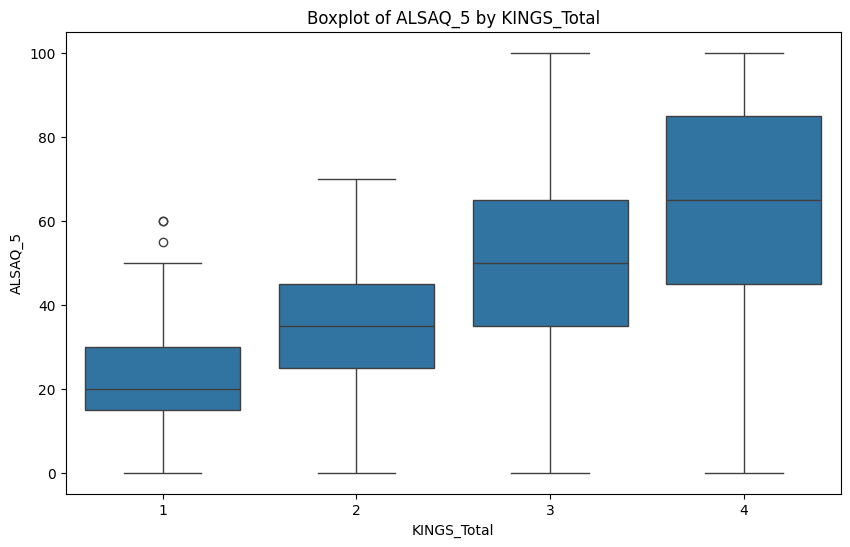

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='KINGS_Total', y='ALSAQ_5')
plt.title('Boxplot of ALSAQ_5 by KINGS_Total')
plt.xlabel('KINGS_Total')
plt.ylabel('ALSAQ_5')
plt.show()


This graph shows how a patient's quality of life (ALSAQ_5) is affected by the King's disease stage (KINGS_Total).

The trend is straightforward:

Higher ALSAQ_5 score = Worse quality of life.

Higher KINGS_Total stage = More advanced disease.

The plot shows that as patients move to a higher disease stage (from 1 to 4), their quality of life score also goes up, meaning their quality of life gets progressively worse. In short, the more advanced the disease, the greater the negative impact on the patient's daily life.

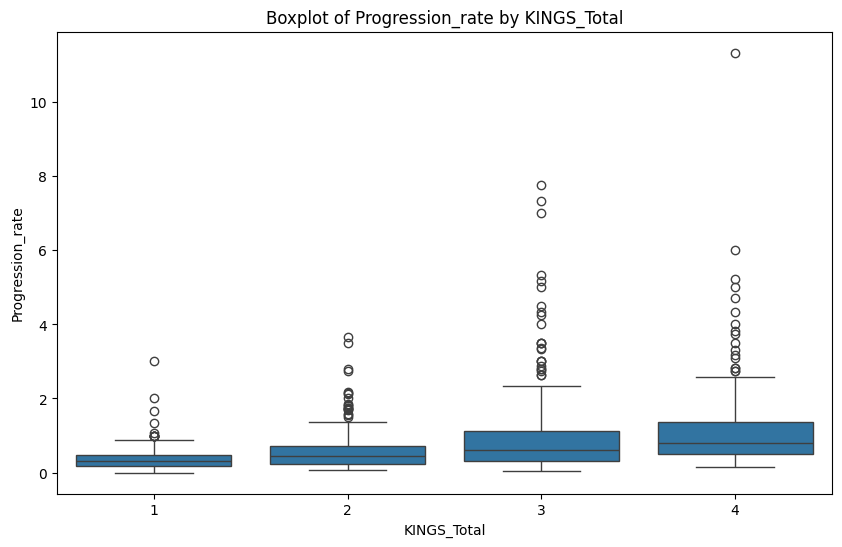

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='KINGS_Total', y='Progression_rate')
plt.title('Boxplot of Progression_rate by KINGS_Total')
plt.xlabel('KINGS_Total')
plt.ylabel('Progression_rate')
plt.show()

This graph shows how the speed of the disease (Progression Rate) changes across the different King's disease stages.

Here’s what it shows:

The average speed of the disease (the line in the middle of each box) doesn't increase by much from stage to stage.

The most important finding is that in Stages 3 and 4, the progression rate becomes much more unpredictable. The boxes are taller, and there are many more dots (outliers) at the top.

In short, as a patient moves into the later stages of the disease, there is a greater chance they could experience a much faster decline in their condition.

In [89]:
fig = px.scatter_3d(df, x='Disease_duration', y='Progression_rate', z='ALSFRS_R',
                    color="Progression_rate", title='3D Scatter Plot of Disease Duration, Progression Rate, and ALSFRS_R (Interactive Plotly)')
fig.show()

This 3D graph is the same as before but uses color to show the speed of the disease, making it much easier to understand at a glance.

Hot Colors (Yellow/Orange) = Fast progression rate (disease gets worse quickly).

Cool Colors (Purple/Blue) = Slow progression rate.

The colors instantly show two key things:

All the yellow and orange dots (fast progression) are clustered on one side, showing they are linked to a short disease duration and a rapid drop in physical function.

The blue and purple dots (slow progression) make up the rest of the shape, confirming that patients who live with the disease for a long time are those whose illness progresses slowly.

In short, the color makes it obvious that the fastest-progressing cases are a distinct group that quickly leads to severe disability.

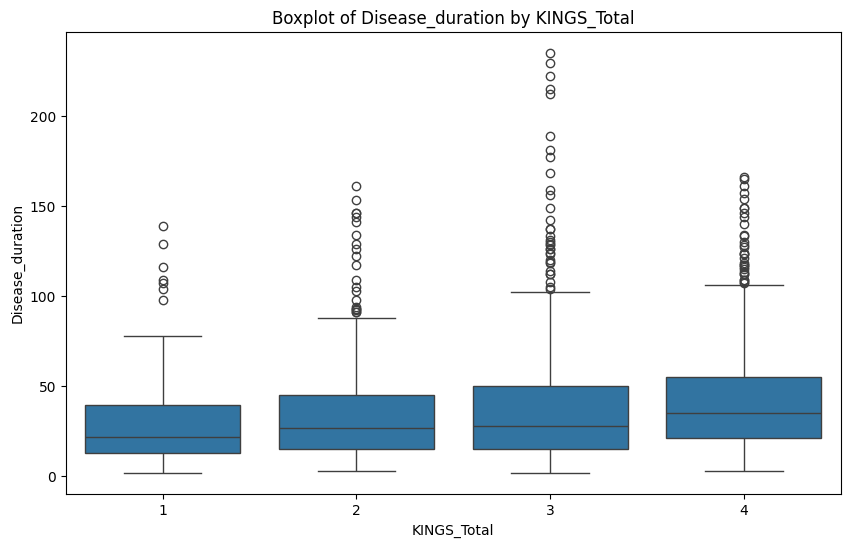

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='KINGS_Total', y='Disease_duration')
plt.title('Boxplot of Disease_duration by KINGS_Total')
plt.xlabel('KINGS_Total')
plt.ylabel('Disease_duration')
plt.show()

This graph shows how long patients have had the disease (Disease Duration) based on their current King's disease stage.

The main takeaway is straightforward:

Patients in Stage 1 are typically earlier in their disease course.

As the stage increases to 2, 3, and 4, the average time since diagnosis also increases.

In simple terms, this plot confirms the logical idea that to reach a later stage of the disease, a patient must have been living with the illness for a longer amount of time.

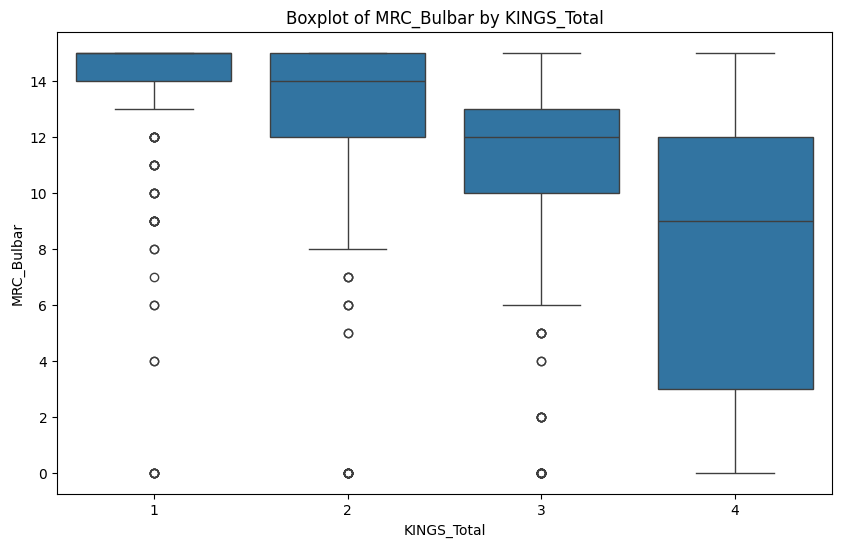

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='KINGS_Total', y='MRC_Bulbar')
plt.title('Boxplot of MRC_Bulbar by KINGS_Total')
plt.xlabel('KINGS_Total')
plt.ylabel('MRC_Bulbar')
plt.show()

This graph shows how the strength of muscles for swallowing and speaking (MRC_Bulbar) changes across the different King's disease stages.

High MRC_Bulbar score = Stronger bulbar muscles.

High KINGS_Total stage = More advanced disease.

The plot shows a clear downward trend:

As patients move to a higher disease stage (from 1 to 4), their bulbar muscle strength gets progressively weaker. Patients in Stage 1 have the best function, while those in Stage 4 have the most severe weakness in these critical muscles.

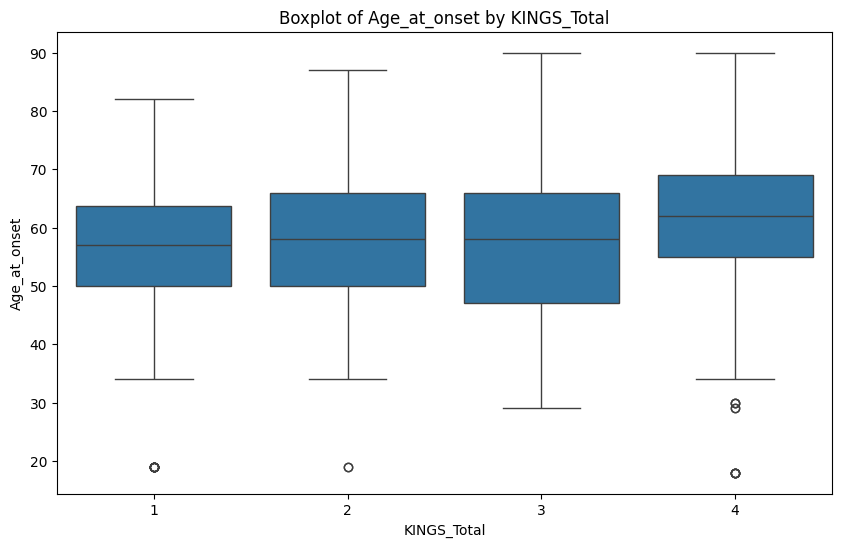

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='KINGS_Total', y='Age_at_onset')
plt.title('Boxplot of Age_at_onset by KINGS_Total')
plt.xlabel('KINGS_Total')
plt.ylabel('Age_at_onset')
plt.show()


This graph checks if the age a person gets ALS has any connection to their disease stage later on.

The answer is no.
The boxes for each stage are all at roughly the same height. This means that the average age of onset is about the same for patients in Stage 1 as it is for patients in Stage 4.

In simple terms, the age you are when the disease starts doesn't predict what stage you'll be in later. The disease stage simply reflects how far the illness has progressed.

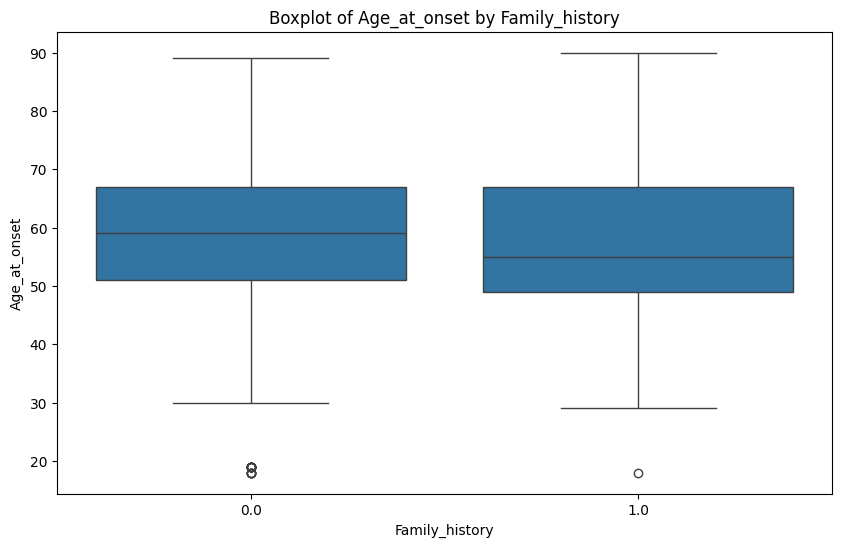

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Family_history', y='Age_at_onset')
plt.title('Boxplot of Age_at_onset by Family_history')
plt.xlabel('Family_history')
plt.ylabel('Age_at_onset')
plt.show()


This graph checks if having a family history of ALS affects the age a person gets the disease.

Both boxes look almost exactly the same. This means that, in this dataset, people with a family history of ALS got the disease around the same age as people without a family history.

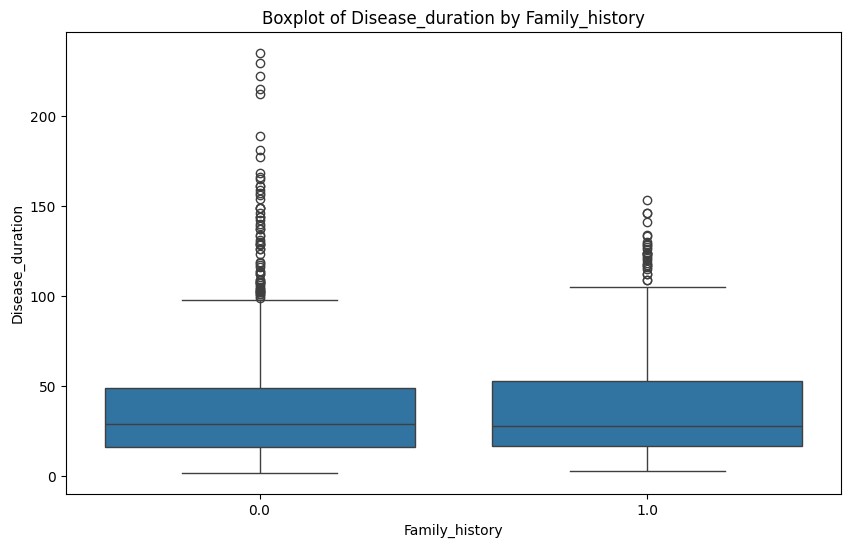

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Family_history', y='Disease_duration')
plt.title('Boxplot of Disease_duration by Family_history')
plt.xlabel('Family_history')
plt.ylabel('Disease_duration')
plt.show()

This graph checks if having a family history of ALS affects how long the disease lasts.

The takeaway is:

For most patients, it doesn't make a big difference. The main boxes for both groups (with and without a family history) look very similar.

However, the group without a family history (labeled 0.0) has more outliers at the top, which means there might be a slightly higher chance of living for an exceptionally long time with the disease if it's not the inherited type.

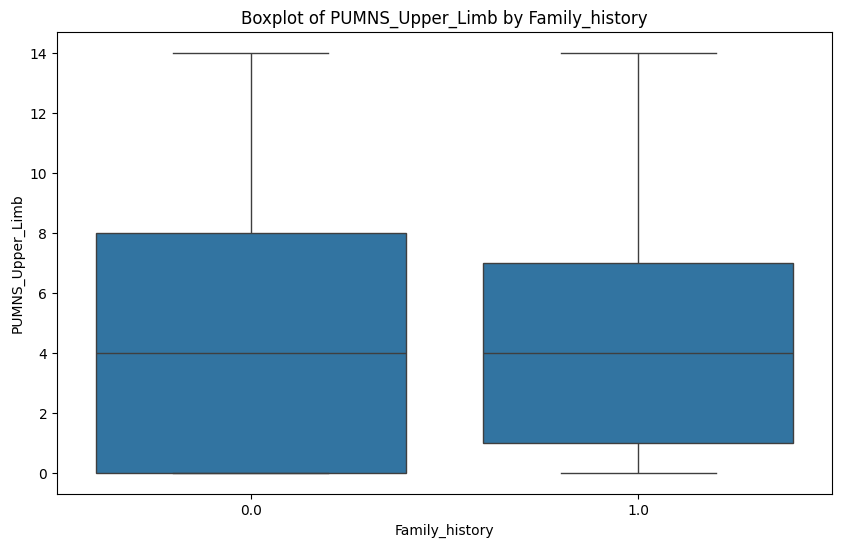

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Family_history', y='PUMNS_Upper_Limb')
plt.title('Boxplot of PUMNS_Upper_Limb by Family_history')
plt.xlabel('Family_history')
plt.ylabel('PUMNS_Upper_Limb')
plt.show()

This graph checks if having a family history of ALS affects the severity of certain nerve symptoms (PUMNS) in the arms.

The plot shows no real difference.

The boxes for both groups—with and without a family history—look the same. This means that, in this dataset, the severity of these symptoms in the arms is similar for both groups.

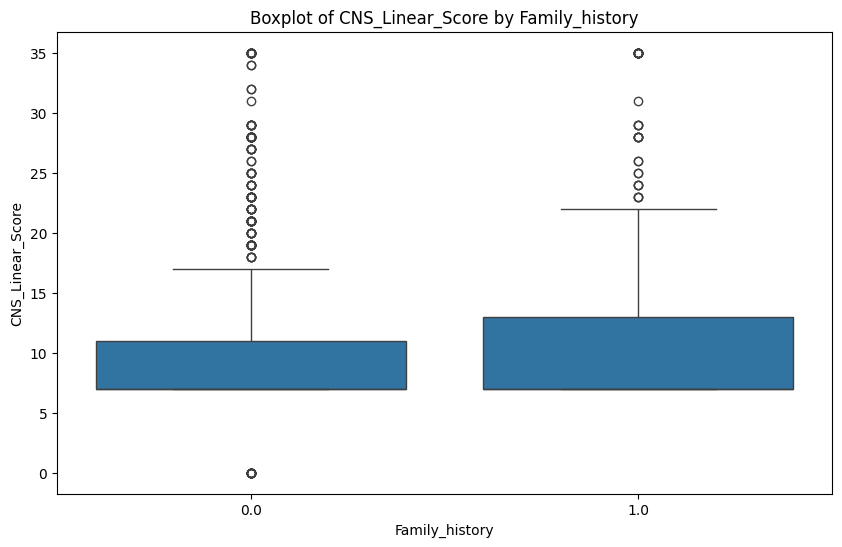

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Family_history', y='CNS_Linear_Score')
plt.title('Boxplot of CNS_Linear_Score by Family_history')
plt.xlabel('Family_history')
plt.ylabel('CNS_Linear_Score')
plt.show()

This graph looks at whether a family history of ALS is connected to the CNS_Linear_Score.


The main boxes for both groups are almost identical. This means that, on average, patients score similarly on this measure whether they have a family history of the disease or not.

In [97]:
df = df.drop('Family_history', axis=1)
display(df.head())

,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
744,133,3,1998-10-08,2018-03-01,2020-12-01,0,19.0,spinale,1.0,>80,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
452,79,1,1955-12-12,2021-01-01,2022-03-01,0,65.0,spinale,1.0,40-60,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
455,81,1,1945-02-18,2024-01-01,2024-07-11,1,79.0,bulbare,1.0,>80,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
1173,214,1,1966-03-16,2017-05-01,2018-11-01,0,51.0,spinale,1.0,>80,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
1174,214,2,1966-03-16,2017-05-01,2018-11-01,0,51.0,spinale,1.0,>80,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


/tmp/ipython-input-16281700.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




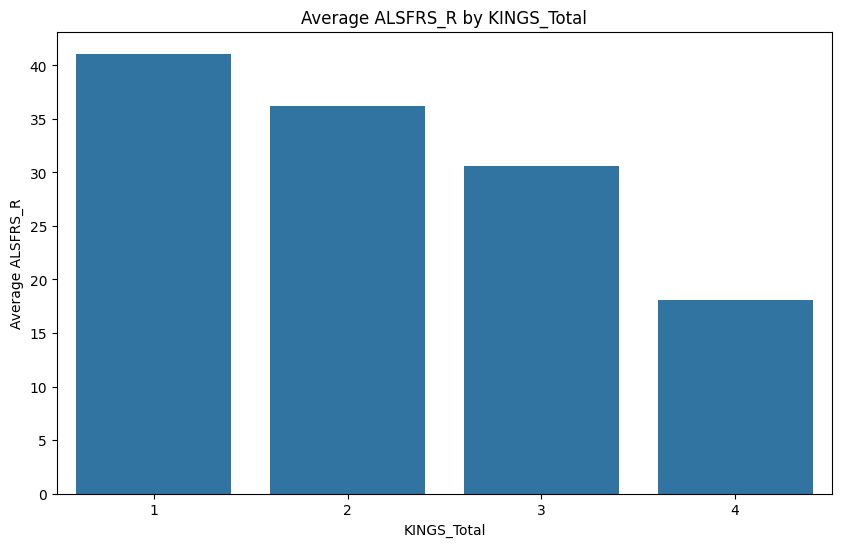

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='KINGS_Total', y='ALSFRS_R', ci=None)
plt.title('Average ALSFRS_R by KINGS_Total')
plt.xlabel('KINGS_Total')
plt.ylabel('Average ALSFRS_R')
plt.show()


This is a simple bar chart that shows the average physical function score (ALSFRS_R) for each King's disease stage.

The message is crystal clear:

As the disease stage gets higher (from 1 to 4), the average physical function score goes down. This confirms that the staging system correctly identifies patients with more advanced and severe disease.

/tmp/ipython-input-3895399379.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




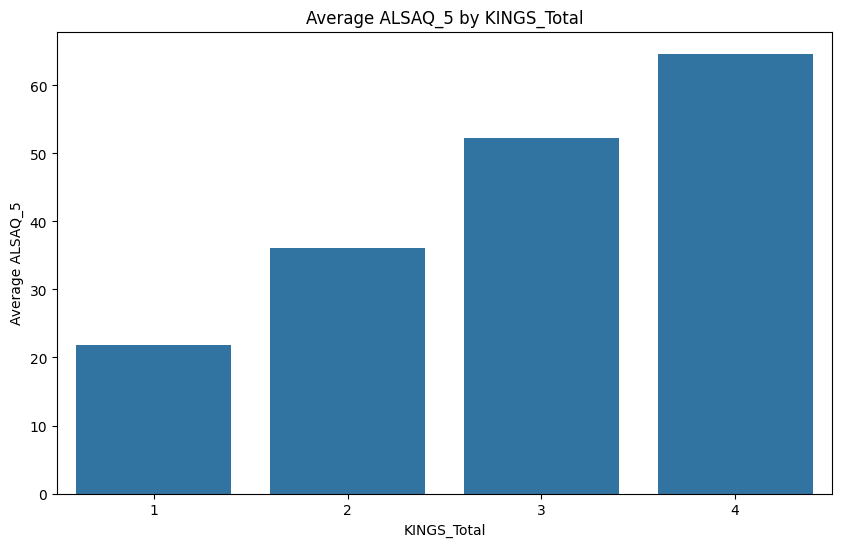

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='KINGS_Total', y='ALSAQ_5', ci=None)
plt.title('Average ALSAQ_5 by KINGS_Total')
plt.xlabel('KINGS_Total')
plt.ylabel('Average ALSAQ_5')
plt.show()

This bar chart shows the average quality of life score (ALSAQ_5) for each King's disease stage.

Remember: a higher score means a worse quality of life.

As the disease stage gets higher (from 1 to 4), the average score goes up. This means that as the disease gets more severe, the patient's reported quality of life gets worse.

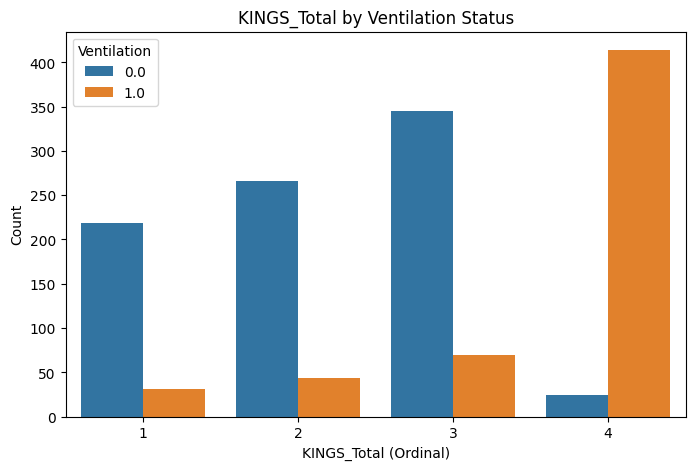

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure KINGS_Total is treated as ordered categorical
df['KINGS_Total'] = pd.Categorical(df['KINGS_Total'], ordered=True)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='KINGS_Total', hue='Ventilation')
plt.title('KINGS_Total by Ventilation Status')
plt.xlabel('KINGS_Total (Ordinal)')
plt.ylabel('Count')
plt.legend(title='Ventilation')
plt.show()


#Data Cleaning

In [101]:
df = pd.read_csv('/content/Advance-Statistical-Learnin--Semester-3/Dataset/df_Final.csv')
display(df.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1.0,>80,0.0,0,0.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1.0,40-60,0.0,0,0.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1.0,>80,0.0,0,0.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


#Preprocessing

###Encoding

In [102]:
from sklearn.preprocessing import LabelEncoder

# Select the 'FVC' column for encoding
fvc_col = ['FVC' , 'Tracheostomy','Spirometry','PEG','Ventilation']

df_encoded = df.copy()


# Apply Label Encoding to the 'FVC' column in df_encoded
for col in fvc_col:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Display the first few rows of the modified DataFrame to verify
display(df_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1,3,0,0,0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1,0,0,0,0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1,3,0,0,0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [103]:
# Drop the 'Patient_ID' and 'Visit_ID' column
df_encoded = df_encoded.drop('Patient_ID', axis=1)
df_encoded = df_encoded.drop('Visit_ID', axis=1)


# Display the first few rows to verify
display(df_encoded.head())

,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,Diagnostic_delay,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,0,19.0,spinale,1,3,0,0,0,Riluzolo,33.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,0,65.0,spinale,1,0,0,0,0,nessuna terapia,14.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,1,79.0,bulbare,1,3,0,0,0,nessuna terapia,6.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,0,51.0,spinale,1,3,0,0,0,Riluzolo,18.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,0,51.0,spinale,1,3,0,0,0,Riluzolo,18.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [104]:
# Select the columns to one-hot encode
cols_to_onehot = ['Therapy', 'Clinical_onset_type']

# Apply one-hot encoding to the selected columns in df_encoded
df_encoded = pd.get_dummies(df_encoded, columns=cols_to_onehot, dtype=int)

# Display the first few rows of the modified DataFrame to verify
display(df_encoded.head())

,Sex,Age_at_onset,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Diagnostic_delay,MRC_Upper_Limb,MRC_Lower_Limb,...,ALSFRS_R,ALSAQ_5,Therapy_Edaravone,Therapy_Riluzolo,Therapy_Riluzolo e Edaravone,Therapy_nessuna terapia,Clinical_onset_type_bulbare,Clinical_onset_type_multiplo,Clinical_onset_type_respiratorio,Clinical_onset_type_spinale
0,0,19.0,1,3,0,0,0,33.0,61.0,50.0,...,45.0,0.0,0,1,0,0,0,0,0,1
1,0,65.0,1,0,0,0,0,14.0,53.0,58.0,...,38.0,15.0,0,0,0,1,0,0,0,1
2,1,79.0,1,3,0,0,0,6.0,66.0,58.0,...,43.0,20.0,0,0,0,1,1,0,0,0
3,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,44.0,20.0,0,1,0,0,0,0,0,1
4,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,45.0,25.0,0,1,0,0,0,0,0,1


###Splitting

In [105]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) using the updated df_encoded
X = df_encoded.drop('KINGS_Total', axis=1)
y = df_encoded['KINGS_Total']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1129, 27)
Testing set shape: (283, 27)


###SMOTE

In [106]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Define which classes to oversample
target_classes = [1, 2]

# Create a dictionary with sampling strategy
# Example: balance 1 and 2 to reach size of class 3
class_counts = y_train.value_counts()
print("Before SMOTE:", class_counts)

sampling_strategy = {
    1: class_counts[3],  # make class 1 as large as class 3
    2: class_counts[3]   # make class 2 as large as class 3
}

# Apply SMOTE
sm = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: KINGS_Total
4    339
3    331
2    257
1    202
Name: count, dtype: int64
After SMOTE: KINGS_Total
4    339
3    331
2    331
1    331
Name: count, dtype: int64


###Scaling

In [107]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the list of numerical features to standardize
numerical_features = [
    'Age_at_onset', 'Diagnostic_delay', 'MRC_Upper_Limb', 'MRC_Lower_Limb',
    'MRC_Bulbar', 'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb', 'PUMNS_Bulbar',
    'CNS_Linear_Score', 'Disease_duration', 'Progression_rate', 'ALSFRS_R', 'ALSAQ_5'
]

# Separate numerical and categorical features for linear models
X_train_numerical = X_train_res[numerical_features]
X_test_numerical = X_test[numerical_features]

# Select the categorical features for linear models (all columns not in numerical_features)
categorical_features = X_train_res.columns.difference(numerical_features)
X_train_categorical = X_train_res[categorical_features]
X_test_categorical = X_test[categorical_features]


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data for numerical features
X_train_scaled_numerical = scaler.fit_transform(X_train_numerical)
X_test_scaled_numerical = scaler.transform(X_test_numerical)

# Convert scaled numerical arrays back to DataFrames for easier concatenation
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train_res.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test.index)

# Concatenate the scaled numerical features with the original categorical features
X_train_scaled = pd.concat([X_train_scaled_numerical_df, X_train_categorical], axis=1)
X_test_scaled = pd.concat([X_test_scaled_numerical_df, X_test_categorical], axis=1)


print("Training data shape after selective scaling:", X_train_scaled.shape)
print("Testing data shape after selective scaling:", X_test_scaled.shape)

Training data shape after selective scaling: (1332, 27)
Testing data shape after selective scaling: (283, 27)


#GLM

##With ALSFRS_R

In [108]:
# Part 1 — Fit ordinal logistic GLM on (X_train_scaled, y_train_res)

from statsmodels.miscmodels.ordinal_model import OrderedModel

# --- Ensure y is coded 0..3 (if it's 1..4, remap)
y_tr = pd.Series(y_train_res).astype(int)
if set(np.unique(y_tr)) == {1,2,3,4}:
    y_tr = y_tr - 1  # -> {0,1,2,3}

# --- Ensure X is a numeric DataFrame (no constant; OrderedModel handles thresholds)
if isinstance(X_train_scaled, np.ndarray):
    X_tr = pd.DataFrame(X_train_scaled)
else:
    X_tr = X_train_scaled.copy()
X_tr = X_tr.astype(float)

# --- Fit proportional-odds (logit link)
mod_glm = OrderedModel(y_tr.values, X_tr, distr="logit")
res_glm = mod_glm.fit(method="lbfgs", maxiter=300, disp=False)

print("=== Ordinal Logistic GLM (train) ===")
print(res_glm.summary())


=== Ordinal Logistic GLM (train) ===
                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -931.02
Model:                   OrderedModel   AIC:                             1922.
Method:            Maximum Likelihood   BIC:                             2078.
Date:                Tue, 09 Sep 2025                                         
Time:                        09:27:38                                         
No. Observations:                1332                                         
Df Residuals:                    1302                                         
Df Model:                          27                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age_at_onset                         0.1115      0

In [109]:
# Part 2 — Evaluate GLM on test data

from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
import numpy as np
import pandas as pd

# --- Ensure y_test is coded 0..3
y_te = pd.Series(y_test).astype(int)
if set(np.unique(y_te)) == {1,2,3,4}:
    y_te = y_te - 1   # map to {0,1,2,3}

# --- Ensure X_test_scaled is DataFrame with correct dtype
if isinstance(X_test_scaled, np.ndarray):
    X_te = pd.DataFrame(X_test_scaled, columns=res_glm.model.exog_names)
else:
    X_te = X_test_scaled.copy()
X_te = X_te.astype(float)

# --- Predict class probabilities
probs = res_glm.predict(X_te)          # shape = (n_test, 4)
yhat  = np.asarray(probs).argmax(axis=1)

# --- Metrics
acc  = accuracy_score(y_te, yhat)
omae = mean_absolute_error(y_te, yhat)
cm   = confusion_matrix(y_te, yhat, labels=[0,1,2,3])

print("=== Test set evaluation ===")
print("Accuracy:", round(acc, 3))
print("Ordinal MAE:", round(omae, 3))
print("\nConfusion matrix (rows=true, cols=pred):\n", cm)


=== Test set evaluation ===
Accuracy: 0.661
Ordinal MAE: 0.367

Confusion matrix (rows=true, cols=pred):
 [[31 16  1  0]
 [15 23 15  0]
 [ 7 20 49  7]
 [ 0  0 15 84]]


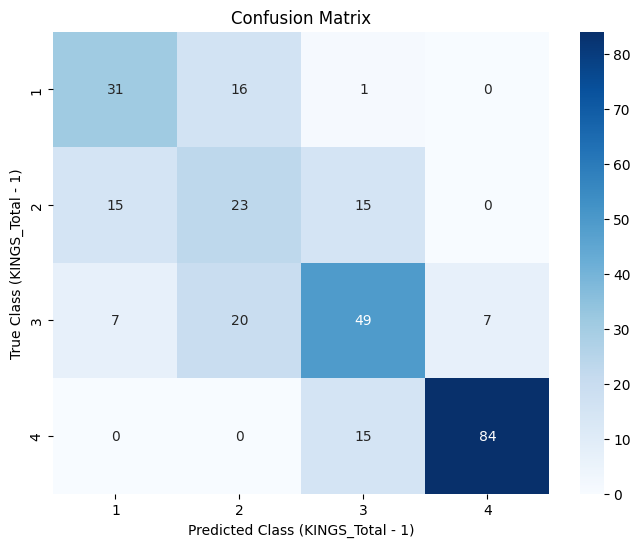

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels for the confusion matrix
class_labels = ['1', '2', '3', '4']

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel('Predicted Class (KINGS_Total - 1)')
plt.ylabel('True Class (KINGS_Total - 1)')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

##Without ALSFRS_R

In [111]:
# Cell 1 — Remove ALSFRS_R-related columns and rebuild train/test matrices

# 1) Ensure we have column names for X; if not, try to recover them from the previous fitted model
if hasattr(X_train_scaled, "columns"):
    Xtr_full = X_train_scaled.copy()
    Xte_full = X_test_scaled.copy()
    colnames = list(Xtr_full.columns)
elif "res_glm" in globals():
    # Use the previously fitted model's exog names
    colnames = list(getattr(res_glm.model, "exog_names", []))
    if not colnames:
        raise ValueError("Could not recover column names from the previous model.")
    Xtr_full = pd.DataFrame(X_train_scaled, columns=colnames)
    Xte_full = pd.DataFrame(X_test_scaled,  columns=colnames)
else:
    raise ValueError("X_train_scaled has no column names. Please provide the feature names to proceed.")

# 2) Identify ALSFRS_R columns (case-insensitive, catches one-hot names too)
drop_cols = [c for c in colnames if "ALSFRS" in c.upper()]
if not drop_cols:
    print("No columns matching 'ALSFRS' were found — proceeding without dropping.")
else:
    print("Dropping columns:", drop_cols)

# 3) Build reduced design matrices
X_train_no_alsfrs = Xtr_full.drop(columns=drop_cols, errors="ignore").astype(float)
X_test_no_alsfrs  = Xte_full.drop(columns=drop_cols, errors="ignore").astype(float)

# 4) Prepare y (ensure 0..3 coding)
y_tr = pd.Series(y_train_res).astype(int)
if set(np.unique(y_tr)) == {1,2,3,4}:
    y_tr = y_tr - 1

y_te = pd.Series(y_test).astype(int)
if set(np.unique(y_te)) == {1,2,3,4}:
    y_te = y_te - 1

print("Shapes — X_train_no_alsfrs:", X_train_no_alsfrs.shape, "| X_test_no_alsfrs:", X_test_no_alsfrs.shape)


Dropping columns: ['ALSFRS_R']
Shapes — X_train_no_alsfrs: (1332, 26) | X_test_no_alsfrs: (283, 26)


In [112]:
# Cell 2 — Fit ordinal logistic GLM (no ALSFRS_R) and evaluate


# 1) Fit model on the reduced training set
mod_glm_no_alsfrs = OrderedModel(y_tr.values, X_train_no_alsfrs, distr="logit")
res_glm_no_alsfrs = mod_glm_no_alsfrs.fit(method="lbfgs", maxiter=300, disp=False)

print("=== Ordinal Logistic GLM WITHOUT ALSFRS_R — Train Summary ===")
print(res_glm_no_alsfrs.summary())

# 2) Evaluate on test
probs_no_alsfrs = res_glm_no_alsfrs.predict(X_test_no_alsfrs)   # (n_test, 4)
yhat_no_alsfrs  = np.asarray(probs_no_alsfrs).argmax(axis=1)

acc_no_alsfrs  = accuracy_score(y_te, yhat_no_alsfrs)
omae_no_alsfrs = mean_absolute_error(y_te, yhat_no_alsfrs)
cm_no_alsfrs   = confusion_matrix(y_te, yhat_no_alsfrs, labels=[0,1,2,3])

print("\n=== Test set (NO ALSFRS_R) ===")
print("Accuracy   :", round(acc_no_alsfrs, 3))
print("Ordinal MAE:", round(omae_no_alsfrs, 3))
print("Confusion matrix (rows=true, cols=pred):\n", cm_no_alsfrs)


=== Ordinal Logistic GLM WITHOUT ALSFRS_R — Train Summary ===
                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -1138.0
Model:                   OrderedModel   AIC:                             2334.
Method:            Maximum Likelihood   BIC:                             2485.
Date:                Tue, 09 Sep 2025                                         
Time:                        09:27:42                                         
No. Observations:                1332                                         
Df Residuals:                    1303                                         
Df Model:                          26                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age_at_onset             

#Posterior Analysis

In [113]:
def simulate_posterior(res_glm, n_draws=5000):
    # 1. Get point estimates and covariance matrix
    beta_hat = res_glm.params
    cov      = res_glm.cov_params()

    # 2. Drop cutpoints (keep only predictors)
    beta_hat = beta_hat[res_glm.model.exog_names]
    cov      = cov.loc[res_glm.model.exog_names, res_glm.model.exog_names]

    # 3. Simulate posterior draws
    draws = np.random.multivariate_normal(mean=beta_hat, cov=cov, size=n_draws)
    draws_df = pd.DataFrame(draws, columns=beta_hat.index)

    # 4. Summarize: mean, 95% CI for log-odds and odds ratios
    summary = []
    for col in draws_df.columns:
        vals = draws_df[col]
        or_vals = np.exp(vals)
        summary.append({
            "predictor": col,
            "logodds_mean": vals.mean(),
            "logodds_2.5%": np.percentile(vals, 2.5),
            "logodds_97.5%": np.percentile(vals, 97.5),
            "OR_mean": or_vals.mean(),
            "OR_2.5%": np.percentile(or_vals, 2.5),
            "OR_97.5%": np.percentile(or_vals, 97.5),
        })
    return pd.DataFrame(summary).set_index("predictor")

# Run for both models
post_glm        = simulate_posterior(res_glm)
post_glm_noa    = simulate_posterior(res_glm_no_alsfrs)

# Display
print("=== With ALSFRS_R ===")
display(post_glm.sort_values("OR_mean", ascending=False))

print("=== Without ALSFRS_R ===")
display(post_glm_noa.sort_values("OR_mean", ascending=False))


=== With ALSFRS_R ===


,logodds_mean,logodds_2.5%,logodds_97.5%,OR_mean,OR_2.5%,OR_97.5%
predictor,,,,,,
Ventilation,1.816573,1.354685,2.273006,6.320152,3.875541,9.708545
Therapy_Edaravone,1.602344,0.820494,2.384920,5.372937,2.271623,10.858200
Clinical_onset_type_respiratorio,1.170751,-0.627622,2.907699,4.765568,0.533860,18.314615
2/3,1.349862,1.243966,1.456249,3.862597,3.469345,4.289840
Therapy_nessuna terapia,1.123093,0.448564,1.787432,3.261388,1.566063,5.974092
MRC_Upper_Limb,0.971407,0.743539,1.196729,2.660147,2.103366,3.309273
Therapy_Riluzolo e Edaravone,0.827148,-0.135809,1.778134,2.583178,0.873010,5.918801
1/2,0.927006,0.828546,1.025082,2.530135,2.289988,2.787325
Therapy_Riluzolo,0.605640,-0.025471,1.218490,1.930212,0.974851,3.382079


=== Without ALSFRS_R ===


,logodds_mean,logodds_2.5%,logodds_97.5%,OR_mean,OR_2.5%,OR_97.5%
predictor,,,,,,
Ventilation,3.540912,3.135407,3.965207,35.296190,22.997991,52.731157
Clinical_onset_type_respiratorio,1.630853,-0.090054,3.324810,7.414761,0.913882,27.793717
Clinical_onset_type_multiplo,1.499229,-0.378083,3.429215,7.206567,0.685174,30.852434
Therapy_Edaravone,1.764100,1.037453,2.489715,6.252255,2.822020,12.057836
PEG,1.504684,0.313441,2.679328,5.417707,1.368125,14.575291
Therapy_Riluzolo e Edaravone,1.484800,0.582515,2.385906,4.896490,1.790536,10.868907
2/3,1.006011,0.898135,1.110080,2.738634,2.455021,3.034600
ALSAQ_5,0.930338,0.745354,1.116951,2.546832,2.107188,3.055525
Therapy_nessuna terapia,0.771431,0.120495,1.420455,2.287424,1.128055,4.139004


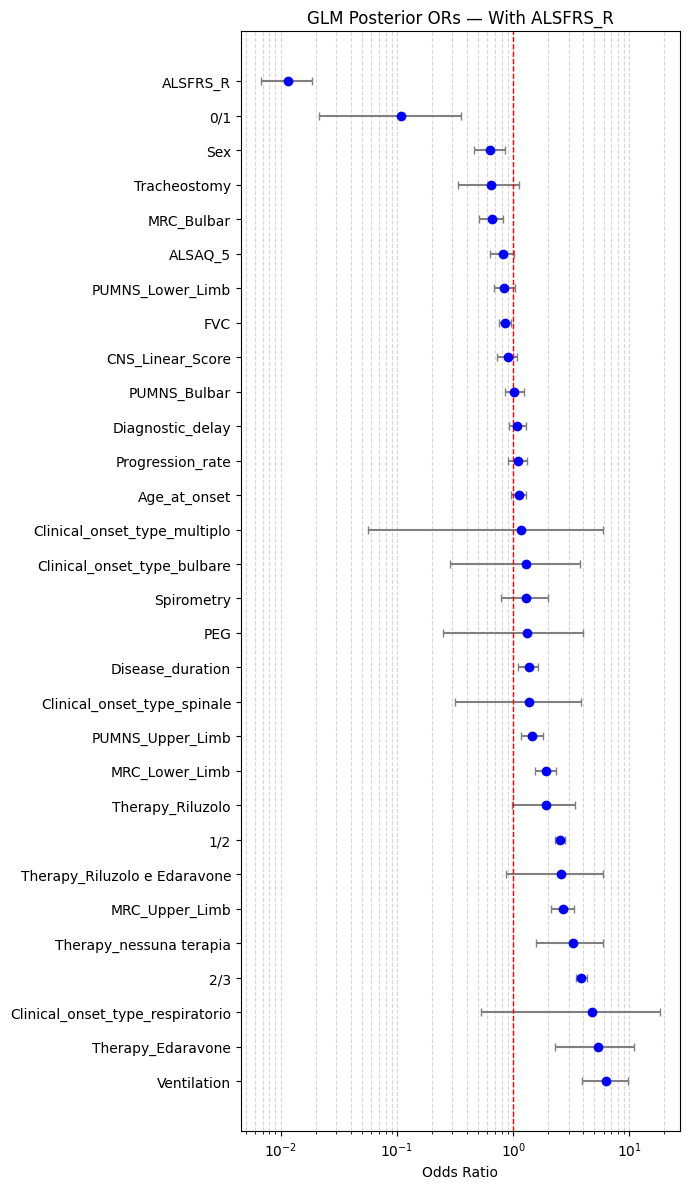

In [114]:
def plot_forest(post_df, title="Posterior Odds Ratios (95% CI)", figsize=(7, None), sort_by="OR_mean"):
    # Sort predictors (optional)
    post_df = post_df.sort_values(by=sort_by)

    # Plot setup
    n = len(post_df)
    figsize = (figsize[0], n * 0.4 if figsize[1] is None else figsize[1])
    fig, ax = plt.subplots(figsize=figsize)

    # Extract values
    or_means = post_df["OR_mean"]
    or_lows  = post_df["OR_2.5%"]
    or_highs = post_df["OR_97.5%"]
    labels   = post_df.index.tolist()
    y_pos    = range(len(post_df))

    # Error bars (horizontal)
    ax.errorbar(
        x=or_means, y=y_pos,
        xerr=[or_means - or_lows, or_highs - or_means],
        fmt='o', color='blue', ecolor='gray', capsize=3
    )

    # Reference line at OR = 1 (no effect)
    ax.axvline(x=1.0, color='red', linestyle='--', linewidth=1)

    # Axes formatting
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.set_xlabel("Odds Ratio")
    ax.set_title(title)
    ax.invert_yaxis()  # Highest OR at top
    ax.set_xscale('log')  # Log scale for ORs

    plt.grid(True, which='both', axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_forest(post_glm, title="GLM Posterior ORs — With ALSFRS_R")


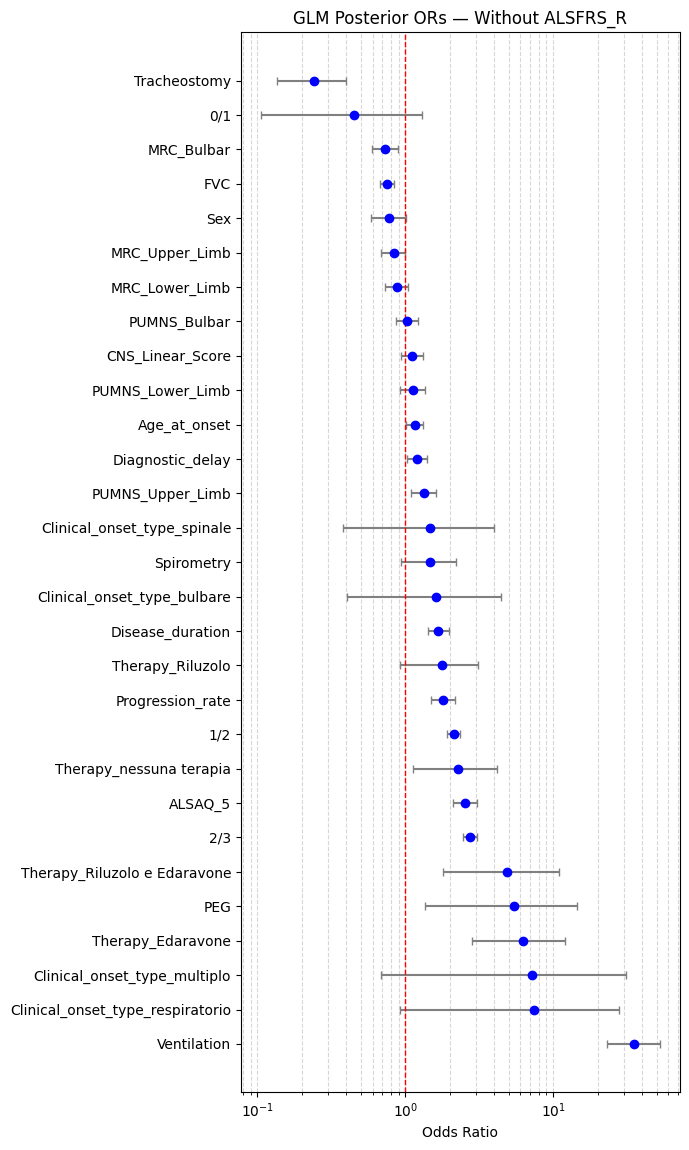

In [115]:
plot_forest(post_glm_noa, title="GLM Posterior ORs — Without ALSFRS_R")

#Residuals Analysis

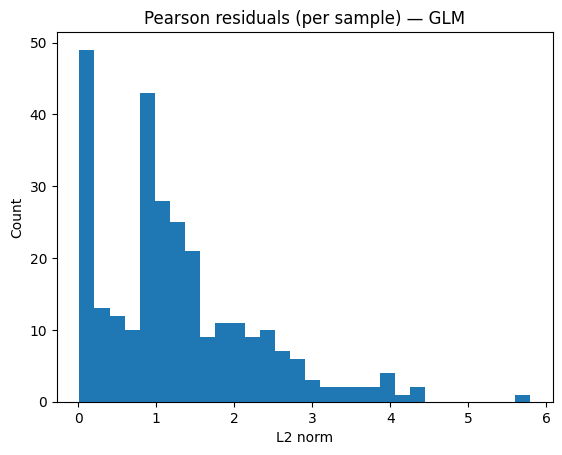

In [116]:
# Predicted probabilities (n_samples, n_classes)
probs = np.asarray(res_glm.predict(X_te))
y_true = pd.Series(y_te).astype(int).values
n_classes = probs.shape[1]

# One-hot observed
obs = np.eye(n_classes)[y_true]

# Pearson residuals (per class), then L2 per sample
eps = 1e-12
den = np.sqrt(np.clip(probs * (1.0 - probs), eps, None))
pearson = (obs - probs) / den
pearson_l2 = np.linalg.norm(pearson, axis=1)

# Plot Pearson residuals
plt.figure()
plt.hist(pearson_l2, bins=30)
plt.title("Pearson residuals (per sample) — GLM")
plt.xlabel("L2 norm")
plt.ylabel("Count")
plt.show()

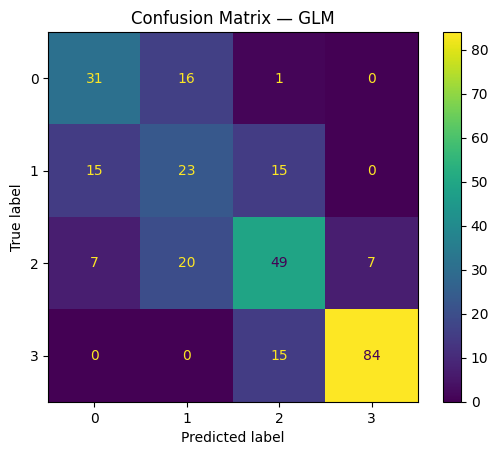

Quadratic Weighted Kappa (GLM): 0.8235


In [117]:
y_pred = probs.argmax(axis=1)
labels = np.sort(np.unique(y_true))

cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(values_format="d")
plt.title("Confusion Matrix — GLM")
plt.show()

kappa_qw = cohen_kappa_score(y_true, y_pred, weights="quadratic")
print("Quadratic Weighted Kappa (GLM):", round(kappa_qw, 4))


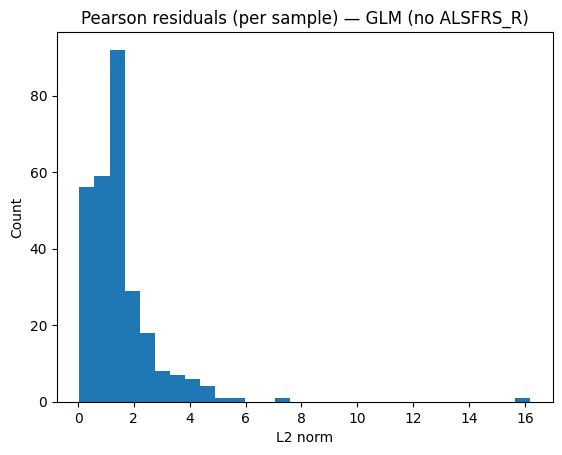

In [118]:
probs_no = np.asarray(res_glm_no_alsfrs.predict(X_test_no_alsfrs))
y_true = pd.Series(y_te).astype(int).values
n_classes_no = probs_no.shape[1]

obs_no = np.eye(n_classes_no)[y_true]

eps = 1e-12
den_no = np.sqrt(np.clip(probs_no * (1.0 - probs_no), eps, None))
pearson_no = (obs_no - probs_no) / den_no
pearson_l2_no = np.linalg.norm(pearson_no, axis=1)

# Plot Pearson residuals
plt.figure()
plt.hist(pearson_l2_no, bins=30)
plt.title("Pearson residuals (per sample) — GLM (no ALSFRS_R)")
plt.xlabel("L2 norm")
plt.ylabel("Count")
plt.show()

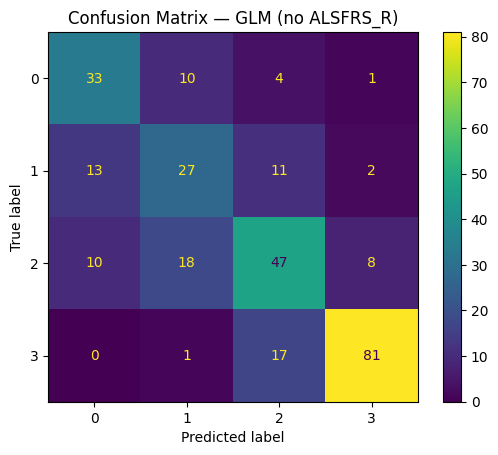

Quadratic Weighted Kappa (GLM, no ALSFRS_R): 0.7765


In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
import matplotlib.pyplot as plt
import numpy as np

y_pred_no = probs_no.argmax(axis=1)
labels = np.sort(np.unique(y_true))

cm_no = confusion_matrix(y_true, y_pred_no, labels=labels)
disp_no = ConfusionMatrixDisplay(confusion_matrix=cm_no, display_labels=labels)
disp_no.plot(values_format="d")
plt.title("Confusion Matrix — GLM (no ALSFRS_R)")
plt.show()

kappa_qw_no = cohen_kappa_score(y_true, y_pred_no, weights="quadratic")
print("Quadratic Weighted Kappa (GLM, no ALSFRS_R):", round(kappa_qw_no, 4))


In [120]:
# Flag low-confidence predictions (e.g., max prob < 0.6)
thr = 0.60
uncertain_full = (probs.max(axis=1) < thr)
uncertain_no   = (probs_no.max(axis=1) < thr)

print("Uncertain rate — full GLM:", uncertain_full.mean())
print("Uncertain rate — GLM no ALSFRS_R:", uncertain_no.mean())


Uncertain rate — full GLM: 0.36395759717314485
Uncertain rate — GLM no ALSFRS_R: 0.607773851590106


#Uncertainty Thresholding

In [121]:
def flag_near_cutpoint(eta, cuts, epsilon=0.05):
    """
    Flags samples whose latent score is within epsilon of any cutpoint.
    """
    # Expand dimensions for broadcasting
    eta_reshaped = eta[:, np.newaxis]  # (n_samples, 1)
    cuts_reshaped = cuts[np.newaxis, :] # (1, n_cuts)

    # Compute absolute distance to all cutpoints
    abs_dist_to_cuts = np.abs(eta_reshaped - cuts_reshaped) # (n_samples, n_cuts)

    # Check if distance to any cutpoint is within epsilon
    near_any_cut = np.any(abs_dist_to_cuts < epsilon, axis=1) # (n_samples,)

    # Compute minimum distance to a cutpoint for diagnostics/exploration
    min_dist_to_cut = np.min(abs_dist_to_cuts, axis=1) # (n_samples,)

    return near_any_cut, min_dist_to_cut


# Predicted probabilities from full GLM
P = np.asarray(probs)    # (n_samples, n_classes)
y_true = np.asarray(y_te)
y_pred = P.argmax(axis=1)

# Calculate the linear predictor (eta) and extract cutpoints (alphas) from the full GLM
# Ensure X_te is a DataFrame and has the columns corresponding to beta's index
p = res_glm.params.copy()
idx = p.index.astype(str)
is_cut = idx.str.contains(r"^\d+/\d+$|^cut_\d+$|^threshold", case=False, regex=True)
beta = p[~is_cut]
cuts = np.sort(p[is_cut].values)

feature_names = beta.index
Xb = X_te[feature_names].astype(float)
eta = Xb.values @ beta[feature_names].values # (n_samples,)

# Calculate the boolean flag for samples near cutpoints (outside the loop)
flag_near_cut, min_dist = flag_near_cutpoint(eta, cuts, epsilon=0.10)


# Define the range of thresholds for MAXP_THR
maxp_thresholds = np.arange(0.45, 0.77, 0.01) # from 0.5 to 0.9 with step 0.01

# Dictionary to store results for each threshold
results_by_maxp_thr = {}

for MAXP_THR in maxp_thresholds:
    # Thresholds for other flags remain constant
    GAP_THR  = 0.15   # flag if top-2 probs too close
    ENTR_THR = 1.0    # entropy cutoff (max = ln(4)=1.386)

    # Compute probability-based metrics
    maxp = P.max(axis=1)
    top2 = np.partition(P, -2, axis=1)[:, -2]
    gap = maxp - top2
    entropy = -(P * np.log(P + 1e-12)).sum(axis=1)

    # Apply probability-based flags
    flag_low_maxp  = maxp < MAXP_THR
    flag_small_gap = gap  < GAP_THR
    flag_high_ent  = entropy > ENTR_THR

    flag_prob_uncertain = flag_low_maxp | flag_small_gap | flag_high_ent

    # Combine all flags into a DataFrame
    flags = pd.DataFrame({
        "y_true": y_true,
        "y_pred": y_pred,
        "max_prob": maxp,
        "top2_gap": gap,
        "entropy": entropy,
        "flag_low_maxprob": flag_low_maxp,
        "flag_small_gap": flag_small_gap,
        "flag_high_entropy": flag_high_ent,
        "uncertain_any_prob": flag_prob_uncertain,
        "flag_near_cutpoint": flag_near_cut # Now available
    })

    # Calculate the final combined uncertainty flag
    flags["uncertain_final"] = flags[["uncertain_any_prob","flag_near_cutpoint"]].any(axis=1)

    # Store the results in the dictionary
    results_by_maxp_thr[MAXP_THR] = flags

# You can now access the results for each threshold from the dictionary
# For example, to see the flags for MAXP_THR = 0.55:
# display(results_by_maxp_thr[0.55].head(10))

print("Uncertainty flagging performed for MAXP_THR values:", maxp_thresholds)
print("Results stored in 'results_by_maxp_thr' dictionary.")

Uncertainty flagging performed for MAXP_THR values: [0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58
 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72
 0.73 0.74 0.75 0.76]
Results stored in 'results_by_maxp_thr' dictionary.


In [122]:
# DataFrame to store the results
analysis_results = []

# Iterate through the results for each MAXP_THR
for maxp_thr, flags_df in results_by_maxp_thr.items():
    # Filter for samples flagged as uncertain
    uncertain_samples = flags_df[flags_df['uncertain_final'] == True]

    # Filter for samples not flagged as uncertain
    not_uncertain_samples = flags_df[flags_df['uncertain_final'] == False]

    # Calculate misclassified and correctly classified counts for uncertain samples
    misclassified_uncertain = uncertain_samples[uncertain_samples['y_true'] != uncertain_samples['y_pred']].shape[0]
    correctly_classified_uncertain = uncertain_samples[uncertain_samples['y_true'] == uncertain_samples['y_pred']].shape[0]

    # Calculate misclassified and correctly classified counts for not uncertain samples
    misclassified_not_uncertain = not_uncertain_samples[not_uncertain_samples['y_true'] != not_uncertain_samples['y_pred']].shape[0]
    correctly_classified_not_uncertain = not_uncertain_samples[not_uncertain_samples['y_true'] == not_uncertain_samples['y_pred']].shape[0]

    # Count total misclassified and correctly classified samples for this threshold
    total_misclassified = flags_df[flags_df['y_true'] != flags_df['y_pred']].shape[0]
    total_correctly_classified = flags_df[flags_df['y_true'] == flags_df['y_pred']].shape[0]


    # Append the results for this threshold, including the requested ratios
    analysis_results.append({
        'MAXP_THR': maxp_thr,
        'Misclassified_Uncertain': misclassified_uncertain,
        'Correctly_Classified_Uncertain': correctly_classified_uncertain,
        'Total_Uncertain': len(uncertain_samples),
        'Total_Not_Uncertain': len(not_uncertain_samples),
        'Total_Samples': len(flags_df),
        'Total_Misclassified_Count': total_misclassified,
        'Total_Correctly_Classified_Count': total_correctly_classified,
        'Ratio_Misclassified_Uncertain_to_Total_Misclassified': misclassified_uncertain / total_misclassified if total_misclassified > 0 else 0,
        'Ratio_Correctly_Classified_Uncertain_to_Total_Correctly_Classified': correctly_classified_uncertain / total_correctly_classified if total_correctly_classified > 0 else 0,
        'Ratio_percentages': (correctly_classified_uncertain / total_correctly_classified) / (misclassified_uncertain / total_misclassified) if (misclassified_uncertain / total_misclassified) > 0 else 0
    })

# Convert the results to a DataFrame
analysis_df = pd.DataFrame(analysis_results)

# Display the results
display(analysis_df.head(10))

,MAXP_THR,Misclassified_Uncertain,Correctly_Classified_Uncertain,Total_Uncertain,Total_Not_Uncertain,Total_Samples,Total_Misclassified_Count,Total_Correctly_Classified_Count,Ratio_Misclassified_Uncertain_to_Total_Misclassified,Ratio_Correctly_Classified_Uncertain_to_Total_Correctly_Classified,Ratio_percentages
0,0.45,55,34,89,194,283,96,187,0.572917,0.181818,0.317355
1,0.46,55,34,89,194,283,96,187,0.572917,0.181818,0.317355
2,0.47,55,34,89,194,283,96,187,0.572917,0.181818,0.317355
3,0.48,55,34,89,194,283,96,187,0.572917,0.181818,0.317355
4,0.49,55,34,89,194,283,96,187,0.572917,0.181818,0.317355
5,0.50,55,34,89,194,283,96,187,0.572917,0.181818,0.317355
6,0.51,55,34,89,194,283,96,187,0.572917,0.181818,0.317355
7,0.52,56,35,91,192,283,96,187,0.583333,0.187166,0.320856
8,0.53,60,36,96,187,283,96,187,0.625000,0.192513,0.308021
9,0.54,62,39,101,182,283,96,187,0.645833,0.208556,0.322926


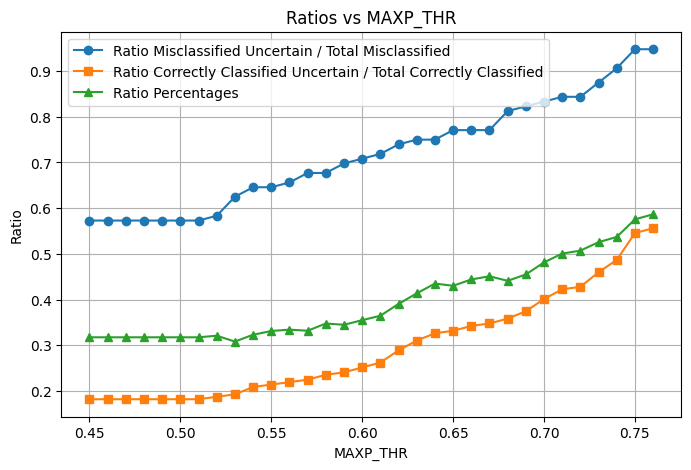

In [123]:
plt.figure(figsize=(8,5))

plt.plot(analysis_df["MAXP_THR"],
         analysis_df["Ratio_Misclassified_Uncertain_to_Total_Misclassified"],
         marker="o", label="Ratio Misclassified Uncertain / Total Misclassified")

plt.plot(analysis_df["MAXP_THR"],
         analysis_df["Ratio_Correctly_Classified_Uncertain_to_Total_Correctly_Classified"],
         marker="s", label="Ratio Correctly Classified Uncertain / Total Correctly Classified")

plt.plot(analysis_df["MAXP_THR"],
         analysis_df["Ratio_percentages"],
         marker="^", label="Ratio Percentages")

plt.xlabel("MAXP_THR")
plt.ylabel("Ratio")
plt.title("Ratios vs MAXP_THR")
plt.legend()
plt.grid(True)
plt.show()


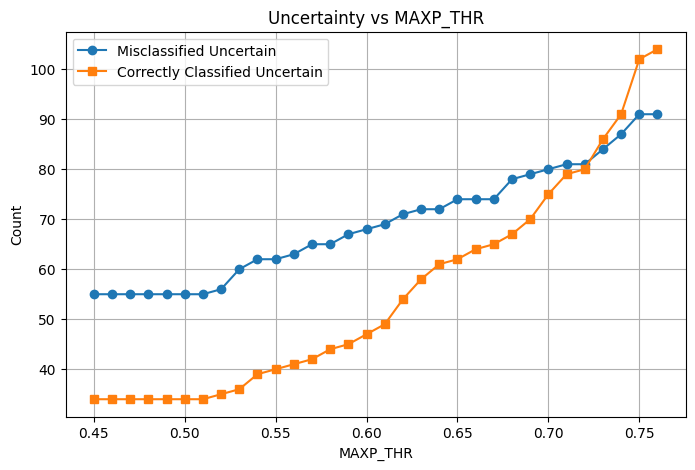

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.plot(analysis_df["MAXP_THR"], analysis_df["Misclassified_Uncertain"],
         marker="o", label="Misclassified Uncertain")

plt.plot(analysis_df["MAXP_THR"], analysis_df["Correctly_Classified_Uncertain"],
         marker="s", label="Correctly Classified Uncertain")

plt.xlabel("MAXP_THR")
plt.ylabel("Count")
plt.title("Uncertainty vs MAXP_THR")
plt.legend()
plt.grid(True)
plt.show()


In [125]:
analysis_df.columns

Index(['MAXP_THR', 'Misclassified_Uncertain', 'Correctly_Classified_Uncertain',
       'Total_Uncertain', 'Total_Not_Uncertain', 'Total_Samples',
       'Total_Misclassified_Count', 'Total_Correctly_Classified_Count',
       'Ratio_Misclassified_Uncertain_to_Total_Misclassified',
       'Ratio_Correctly_Classified_Uncertain_to_Total_Correctly_Classified',
       'Ratio_percentages'],
      dtype='object')

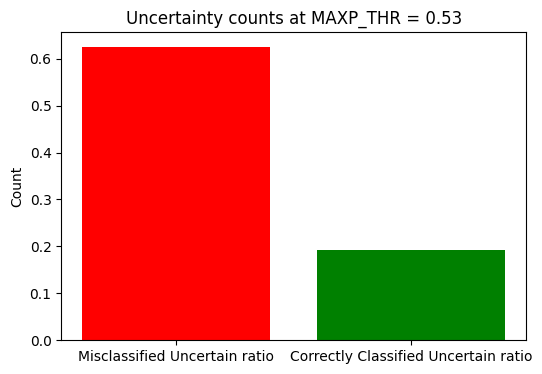

In [126]:
# Select the row where MAXP_THR == 0.53
row = analysis_df[analysis_df["MAXP_THR"] == 0.53].iloc[0]

values = [row["Ratio_Misclassified_Uncertain_to_Total_Misclassified"], row["Ratio_Correctly_Classified_Uncertain_to_Total_Correctly_Classified"]]
labels = ["Misclassified Uncertain ratio", "Correctly Classified Uncertain ratio"]

plt.figure(figsize=(6,4))
plt.bar(labels, values, color=["red", "green"])

plt.title("Uncertainty counts at MAXP_THR = 0.53")
plt.ylabel("Count")
plt.show()


#Interpretation

In [127]:
# --- Step 1: Define threshold
thr = 0.53

# --- Step 2: Get max probability and predictions
maxp = probs.max(axis=1)          # highest probability for each sample
y_pred = probs.argmax(axis=1)     # predicted class
mis    = (y_te != y_pred)         # misclassification flag

# --- Step 3: Apply threshold
uncertain_mask = (maxp < thr)

# --- Step 4: Filter the data
df_thr = pd.DataFrame({
    "y_true": y_te,
    "y_pred": y_pred,
    "maxp": maxp,
    "misclassified": mis,
    "uncertain": uncertain_mask
})

# --- Step 5: Keep only the uncertain samples (below threshold)
df_uncertain_053 = df_thr[df_thr["uncertain"] == True]

# --- Step 6: Keep only the confident samples (above threshold)
df_confident_053 = df_thr[df_thr["uncertain"] == False]

display(df_uncertain_053.head())
display(df_confident_053.head())


,y_true,y_pred,maxp,misclassified,uncertain
67,0,1,0.528675,True,True
875,2,0,0.470696,True,True
123,0,1,0.526535,True,True
573,2,1,0.486578,True,True
306,1,1,0.526606,False,True


,y_true,y_pred,maxp,misclassified,uncertain
741,2,3,0.613193,True,False
865,2,2,0.554862,False,False
339,1,1,0.553637,False,False
192,0,0,0.946772,False,False
203,0,1,0.559225,True,False


In [128]:
from sklearn.metrics import confusion_matrix

# --- Original confusion matrix (all samples)
cm_original = confusion_matrix(y_te, y_pred)

# --- Filtered (confident only)
cm_filtered = confusion_matrix(
    df_confident_053["y_true"],
    df_confident_053["y_pred"]
)

print("=== Confusion Matrix: Original ===")
print(cm_original)

print("\n=== Confusion Matrix: Filtered (maxp >= 0.53) ===")
print(cm_filtered)


=== Confusion Matrix: Original ===
[[31 16  1  0]
 [15 23 15  0]
 [ 7 20 49  7]
 [ 0  0 15 84]]

=== Confusion Matrix: Filtered (maxp >= 0.53) ===
[[28  9  0  0]
 [14 14 12  0]
 [ 3 10 48  4]
 [ 0  0 11 83]]


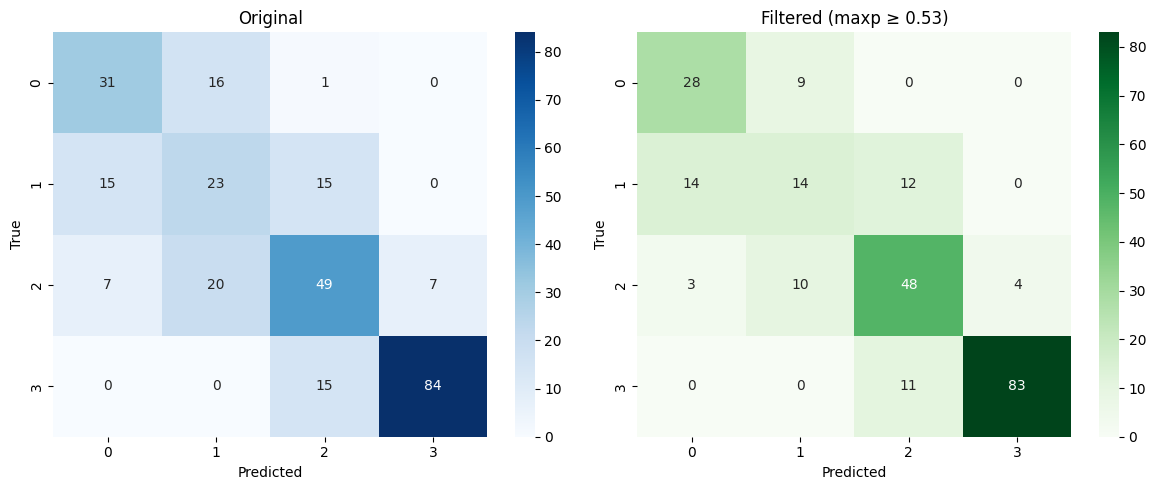

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_original, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Original")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(cm_filtered, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Filtered (maxp ≥ 0.53)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()


In [130]:
import numpy as np
import pandas as pd

def bayesian_posterior(cm):
    """
    Compute Bayesian posterior probabilities from a confusion matrix.
    cm[i, j] = count of samples with true=i, predicted=j
    """
    cm = np.asarray(cm)
    n_classes = cm.shape[0]

    # Prior: frequency of each true class
    priors = cm.sum(axis=1) / cm.sum()

    # Likelihood: P(predicted=j | true=i)
    likelihood = cm / cm.sum(axis=1, keepdims=True)

    # Posterior: P(true=i | predicted=j)
    # Bayes' rule: proportional to likelihood.T * prior
    posteriors = np.zeros_like(likelihood.T, dtype=float)

    for j in range(n_classes):  # predicted class
        numerator = likelihood[:, j] * priors
        denominator = numerator.sum()
        if denominator > 0:
            posteriors[j, :] = numerator / denominator

    return pd.DataFrame(
        posteriors,
        index=[f"Pred {j}" for j in range(n_classes)],
        columns=[f"True {i}" for i in range(n_classes)]
    )

# --- Calculate posteriors ---
posterior_original = bayesian_posterior(cm_original)
posterior_filtered = bayesian_posterior(cm_filtered)

print("=== Posterior (Original) ===")
print(posterior_original.round(3))

print("\n=== Posterior (Filtered, maxp ≥ 0.53) ===")
print(posterior_filtered.round(3))


=== Posterior (Original) ===
        True 0  True 1  True 2  True 3
Pred 0   0.585   0.283   0.132   0.000
Pred 1   0.271   0.390   0.339   0.000
Pred 2   0.013   0.188   0.612   0.188
Pred 3   0.000   0.000   0.077   0.923

=== Posterior (Filtered, maxp ≥ 0.53) ===
        True 0  True 1  True 2  True 3
Pred 0   0.622   0.311   0.067   0.000
Pred 1   0.273   0.424   0.303   0.000
Pred 2   0.000   0.169   0.676   0.155
Pred 3   0.000   0.000   0.046   0.954


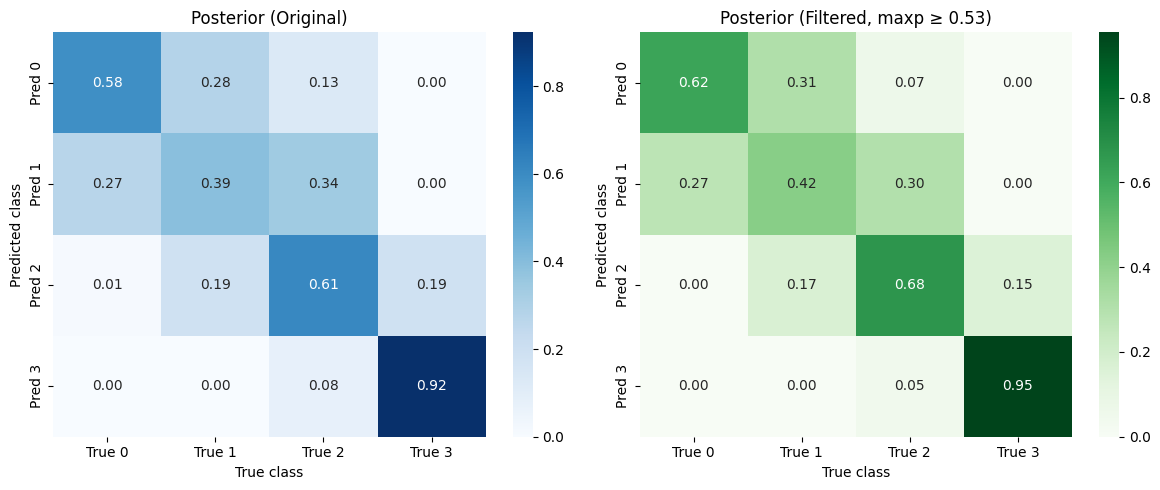

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_posteriors(post_original, post_filtered):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(post_original, annot=True, cmap="Blues", fmt=".2f", ax=axes[0])
    axes[0].set_title("Posterior (Original)")
    axes[0].set_xlabel("True class")
    axes[0].set_ylabel("Predicted class")

    sns.heatmap(post_filtered, annot=True, cmap="Greens", fmt=".2f", ax=axes[1])
    axes[1].set_title("Posterior (Filtered, maxp ≥ 0.53)")
    axes[1].set_xlabel("True class")
    axes[1].set_ylabel("Predicted class")

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_posteriors(posterior_original, posterior_filtered)


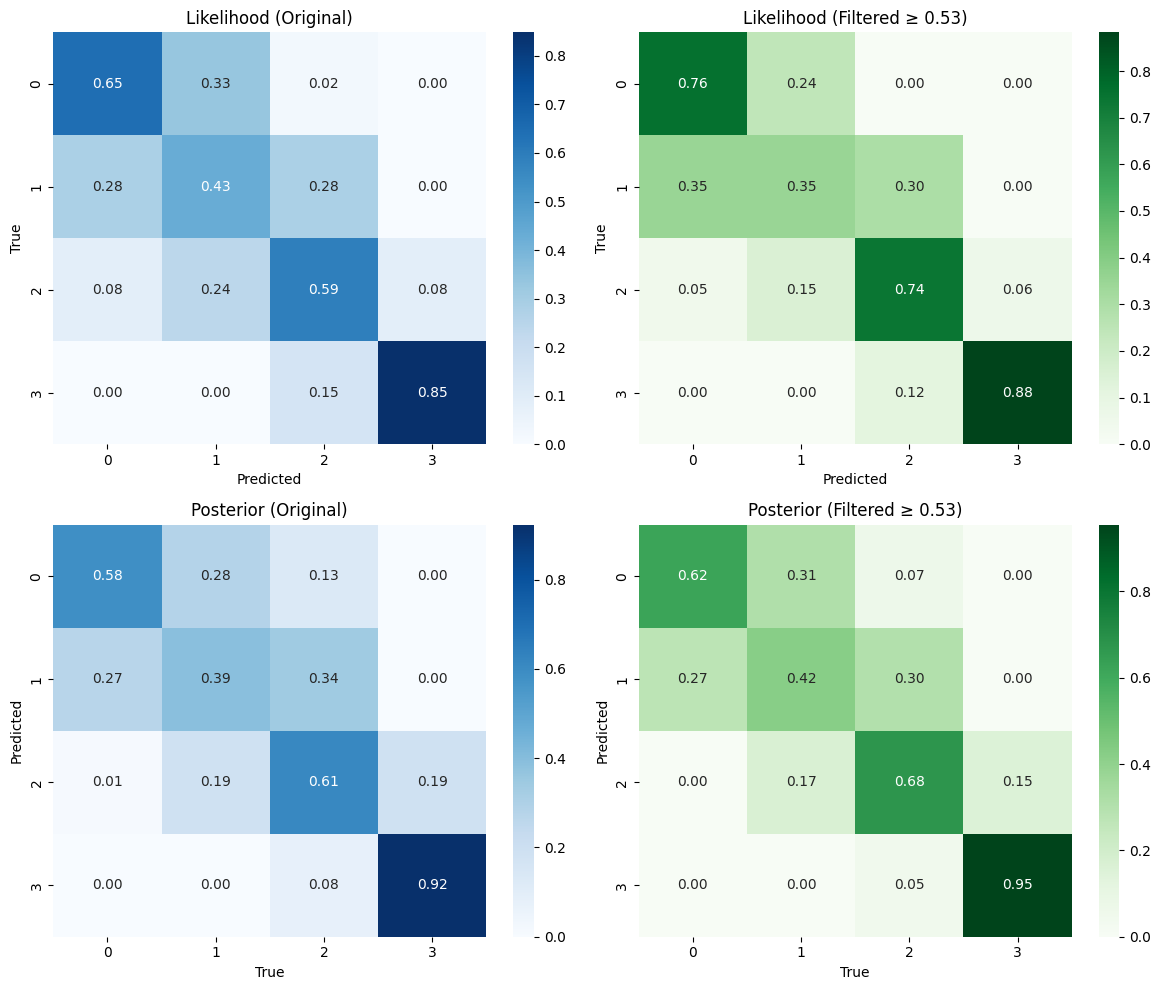

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def likelihood_matrix(cm):
    """
    Compute likelihood matrix: P(predicted=j | true=i).
    Each row sums to 1 across predicted classes.
    """
    cm = np.asarray(cm)
    return cm / cm.sum(axis=1, keepdims=True)

def bayesian_posterior(cm):
    """
    Compute posterior: P(true=i | predicted=j).
    Each row sums to 1 across true classes.
    """
    cm = np.asarray(cm)
    n_classes = cm.shape[0]

    priors = cm.sum(axis=1) / cm.sum()  # class priors
    likelihood = cm / cm.sum(axis=1, keepdims=True)

    posteriors = np.zeros_like(likelihood.T, dtype=float)

    for j in range(n_classes):  # predicted class
        numerator = likelihood[:, j] * priors
        denominator = numerator.sum()
        if denominator > 0:
            posteriors[j, :] = numerator / denominator

    return posteriors

def plot_matrix(matrix, title, cmap, xlabel, ylabel, fmt=".2f"):
    sns.heatmap(matrix, annot=True, cmap=cmap, fmt=fmt)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

# --- Likelihoods ---
likelihood_original = likelihood_matrix(cm_original)
likelihood_filtered = likelihood_matrix(cm_filtered)

# --- Posteriors ---
posterior_original = bayesian_posterior(cm_original)
posterior_filtered = bayesian_posterior(cm_filtered)

# --- Plotting ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.sca(axes[0,0])
plot_matrix(likelihood_original, "Likelihood (Original)", "Blues", "Predicted", "True")

plt.sca(axes[0,1])
plot_matrix(likelihood_filtered, "Likelihood (Filtered ≥ 0.53)", "Greens", "Predicted", "True")

plt.sca(axes[1,0])
plot_matrix(posterior_original, "Posterior (Original)", "Blues", "True", "Predicted")

plt.sca(axes[1,1])
plot_matrix(posterior_filtered, "Posterior (Filtered ≥ 0.53)", "Greens", "True", "Predicted")

plt.tight_layout()
plt.show()
